0: D Loss - 1.3687973022460938 G Loss - 0.5459803938865662


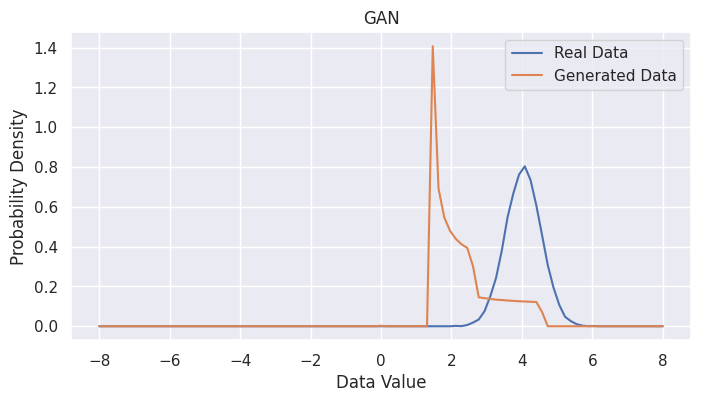

10: D Loss - 1.306902527809143 G Loss - 0.6783601641654968
20: D Loss - 1.301268219947815 G Loss - 0.7045369744300842
30: D Loss - 1.3097728490829468 G Loss - 0.708476722240448
40: D Loss - 1.3122953176498413 G Loss - 0.7082740664482117
50: D Loss - 1.3311004638671875 G Loss - 0.6995220184326172
60: D Loss - 1.3708553314208984 G Loss - 0.6835319995880127
70: D Loss - 1.3847746849060059 G Loss - 0.6760697364807129
80: D Loss - 1.4002894163131714 G Loss - 0.6721659302711487
90: D Loss - 1.3874578475952148 G Loss - 0.6740630269050598
100: D Loss - 1.3926805257797241 G Loss - 0.6740155816078186


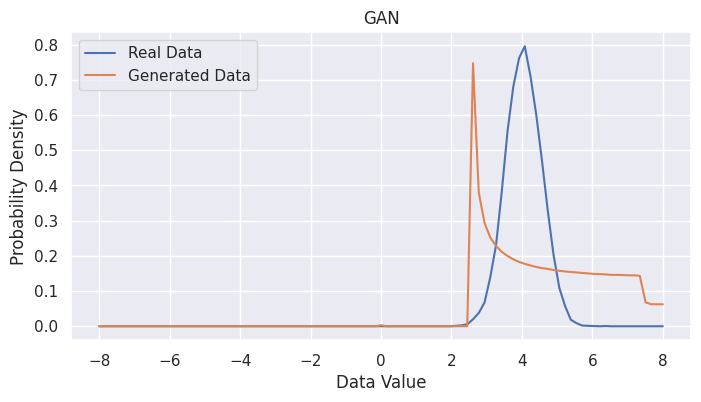

110: D Loss - 1.4036678075790405 G Loss - 0.6779066920280457
120: D Loss - 1.401509165763855 G Loss - 0.6799214482307434
130: D Loss - 1.3939915895462036 G Loss - 0.682715117931366
140: D Loss - 1.3929659128189087 G Loss - 0.6850583553314209
150: D Loss - 1.3911346197128296 G Loss - 0.6873590350151062
160: D Loss - 1.3897666931152344 G Loss - 0.6893956065177917
170: D Loss - 1.3823819160461426 G Loss - 0.6912348866462708
180: D Loss - 1.3800328969955444 G Loss - 0.692655086517334
190: D Loss - 1.378137230873108 G Loss - 0.6940431594848633
200: D Loss - 1.378203272819519 G Loss - 0.6952540278434753


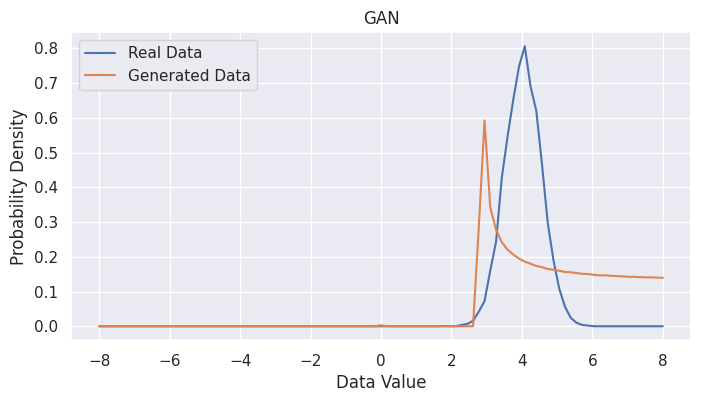

210: D Loss - 1.3751893043518066 G Loss - 0.6964045166969299
220: D Loss - 1.3746849298477173 G Loss - 0.697899341583252
230: D Loss - 1.3729634284973145 G Loss - 0.6995601654052734
240: D Loss - 1.3692549467086792 G Loss - 0.7001028060913086
250: D Loss - 1.367417335510254 G Loss - 0.7012574672698975
260: D Loss - 1.3653335571289062 G Loss - 0.7031696438789368
270: D Loss - 1.3642501831054688 G Loss - 0.7028704285621643
280: D Loss - 1.3590689897537231 G Loss - 0.7053006291389465
290: D Loss - 1.3572224378585815 G Loss - 0.7060823440551758
300: D Loss - 1.3637479543685913 G Loss - 0.7019529342651367


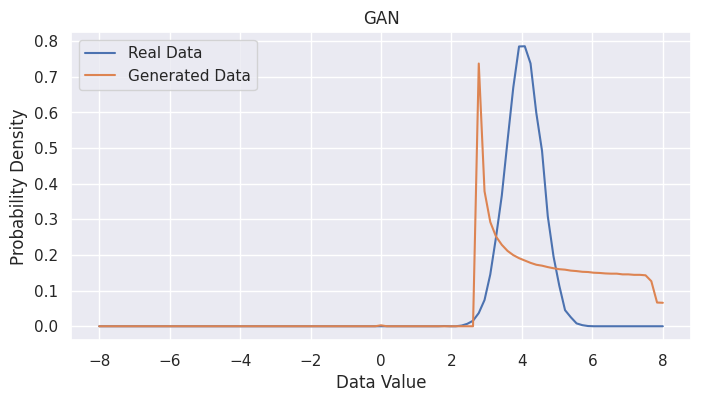

310: D Loss - 1.3596407175064087 G Loss - 0.7025794386863708
320: D Loss - 1.3605756759643555 G Loss - 0.7048212885856628
330: D Loss - 1.3620834350585938 G Loss - 0.7026931643486023
340: D Loss - 1.3682485818862915 G Loss - 0.6991710662841797
350: D Loss - 1.3684436082839966 G Loss - 0.6974234580993652
360: D Loss - 1.3610563278198242 G Loss - 0.6993597149848938
370: D Loss - 1.3706189393997192 G Loss - 0.6940346360206604
380: D Loss - 1.3691502809524536 G Loss - 0.6934105753898621
390: D Loss - 1.3722724914550781 G Loss - 0.6916284561157227
400: D Loss - 1.375387191772461 G Loss - 0.6866503357887268


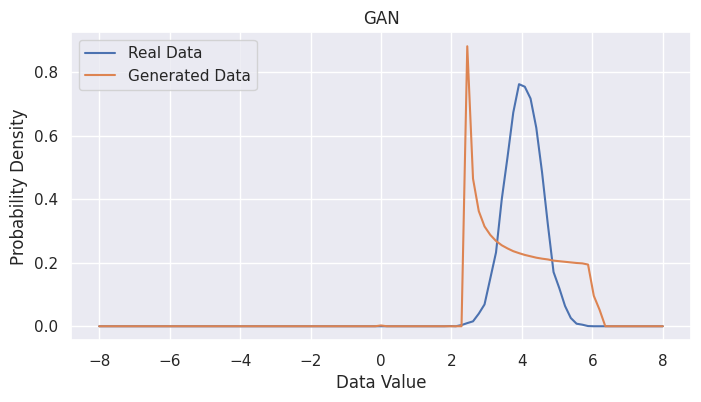

410: D Loss - 1.3761547803878784 G Loss - 0.6851458549499512
420: D Loss - 1.376116394996643 G Loss - 0.6861328482627869
430: D Loss - 1.3727933168411255 G Loss - 0.6901359558105469
440: D Loss - 1.3725894689559937 G Loss - 0.6886637806892395
450: D Loss - 1.373753547668457 G Loss - 0.6895735859870911
460: D Loss - 1.3705458641052246 G Loss - 0.6933870315551758
470: D Loss - 1.3735551834106445 G Loss - 0.696510374546051
480: D Loss - 1.3669689893722534 G Loss - 0.6969702243804932
490: D Loss - 1.3672491312026978 G Loss - 0.6992778778076172


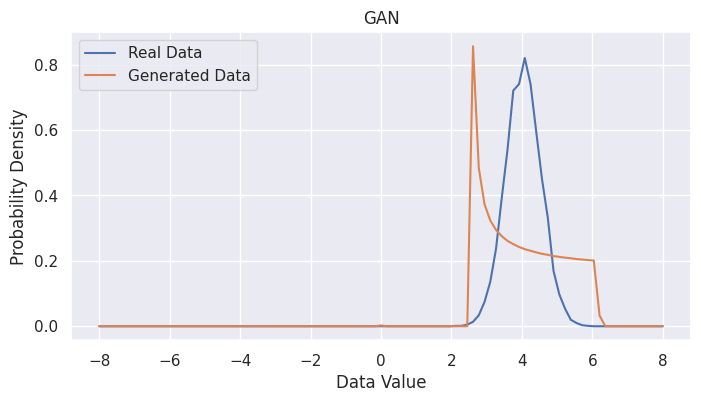

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)


class DataDistribution:
    def __init__(self):
        self.mu = 4
        self.sigma = 0.5

    def sample(self, N):
        samples = np.random.normal(self.mu, self.sigma, N)
        samples.sort()
        return samples


class GeneratorDistribution:
    def __init__(self, f_range):
        self.f_range = f_range

    def sample(self, N):
        return np.linspace(-self.f_range, self.f_range, N) + np.random.random(N) * 0.01


class GAN:
    def __init__(self, data, gen, num_steps, batch_size, log_every):
        self.data = data
        self.gen = gen
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.log_every = log_every

        self.mlp_hidden_size = 4
        self.learning_rate = 0.03
        self._create_model()

    def _create_model(self):
        self.generator = tf.keras.Sequential([
            tf.keras.layers.Dense(self.mlp_hidden_size, activation="softplus"),
            tf.keras.layers.Dense(1)
        ])

        self.discriminator = tf.keras.Sequential([
            tf.keras.layers.Dense(self.mlp_hidden_size * 2, activation="tanh"),
            tf.keras.layers.Dense(self.mlp_hidden_size * 2, activation="tanh"),
            tf.keras.layers.Dense(self.mlp_hidden_size * 2, activation="tanh"),
            tf.keras.layers.Dense(1, activation="sigmoid")
        ])

        self.opt_d = self._create_optimizer(self.learning_rate)
        self.opt_g = self._create_optimizer(self.learning_rate)

    def _create_optimizer(self, initial_learning_rate):
        decay = 0.95
        num_decay_steps = 150
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_learning_rate,
            decay_steps=num_decay_steps,
            decay_rate=decay,
            staircase=True
        )
        return tf.keras.optimizers.SGD(learning_rate=lr_schedule)

    def train(self):
        for step in range(self.num_steps):
            x = self.data.sample(self.batch_size)
            z = self.gen.sample(self.batch_size)

            # Train Discriminator
            with tf.GradientTape() as tape_d:
                d_real = self.discriminator(tf.convert_to_tensor(np.reshape(x, (self.batch_size, 1)), dtype=tf.float32))
                d_fake = self.discriminator(self.generator(tf.convert_to_tensor(np.reshape(z, (self.batch_size, 1)), dtype=tf.float32)))
                loss_d = -tf.reduce_mean(tf.math.log(d_real + 1e-12) + tf.math.log(1 - d_fake + 1e-12))

            grads_d = tape_d.gradient(loss_d, self.discriminator.trainable_variables)
            self.opt_d.apply_gradients(zip(grads_d, self.discriminator.trainable_variables))

            # Train Generator
            z = self.gen.sample(self.batch_size)
            with tf.GradientTape() as tape_g:
                d_fake = self.discriminator(self.generator(tf.convert_to_tensor(np.reshape(z, (self.batch_size, 1)), dtype=tf.float32)))
                loss_g = -tf.reduce_mean(tf.math.log(d_fake + 1e-12))

            grads_g = tape_g.gradient(loss_g, self.generator.trainable_variables)
            self.opt_g.apply_gradients(zip(grads_g, self.generator.trainable_variables))

            if step % self.log_every == 0:
                print(f"{step}: D Loss - {loss_d.numpy()} G Loss - {loss_g.numpy()}")

            if step % 100 == 0 or step == 0 or step == self.num_steps - 1:
                self._plot_distributions()

    def _samples(self, num_points=10000, num_bins=100):
        xs = np.linspace(-self.gen.f_range, self.gen.f_range, num_points)
        bins = np.linspace(-self.gen.f_range, self.gen.f_range, num_bins)

        d = self.data.sample(num_points)
        pd, _ = np.histogram(d, bins=bins, density=True)

        zs = np.linspace(-self.gen.f_range, self.gen.f_range, num_points)
        g = np.zeros((num_points, 1))

        for i in range(num_points // self.batch_size):
            g[self.batch_size * i: self.batch_size * (i + 1)] = self.generator(
                tf.convert_to_tensor(np.reshape(zs[self.batch_size * i: self.batch_size * (i + 1)], (self.batch_size, 1)), dtype=tf.float32)
            ).numpy()

        pg, _ = np.histogram(g, bins=bins, density=True)
        return pd, pg

    def _plot_distributions(self):
        pd, pg = self._samples()
        p_x = np.linspace(-self.gen.f_range, self.gen.f_range, len(pd))
        plt.figure(figsize=(8, 4))
        plt.plot(p_x, pd, label="Real Data")
        plt.plot(p_x, pg, label="Generated Data")
        plt.title("GAN")
        plt.xlabel("Data Value")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.show()


# Training Parameters
num_steps = 500
batch_size = 12
log_every = 10


def main():
    model = GAN(
        DataDistribution(),
        GeneratorDistribution(f_range=8),
        num_steps,
        batch_size,
        log_every
    )
    model.train()


main()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seeds for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [ ]:
class DataDistribution:
    def __init__(self):
        self.mu = 4
        self.sigma = 0.5

    def sample(self, N):
        samples = np.random.normal(self.mu, self.sigma, N)
        samples.sort()
        return samples


class GeneratorDistribution:
    def __init__(self, f_range):
        self.f_range = f_range

    def sample(self, N):
      # A small random noise is added to each point so that
      # the distribution is not completely uniform, simulating the randomness of the generator's input.
        return np.linspace(-self.f_range, self.f_range, N) + np.random.rand(N) * 0.01

In [ ]:
class Generator(nn.Module):
    def __init__(self, hidden_dim):
      # Softplus is a smoothed version of ReLU, suitable for generator tasks.
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, hidden_dim),
            nn.Softplus(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.model(x)


class Discriminator(nn.Module):
    def __init__(self, hidden_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, hidden_dim * 2),
            nn.Tanh(),
            nn.Linear(hidden_dim * 2, hidden_dim * 2),
            nn.Tanh(),
            nn.Linear(hidden_dim * 2, hidden_dim * 2),
            nn.Tanh(),
            nn.Linear(hidden_dim * 2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
class GAN:
    def __init__(self, data, gen, num_steps, batch_size, log_every):
        self.data = data
        self.gen = gen
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.log_every = log_every

        self.mlp_hidden_size = 4
        self.learning_rate = 0.03

        # Initialize generator and discriminator
        self.generator = Generator(self.mlp_hidden_size)
        self.discriminator = Discriminator(self.mlp_hidden_size)

        # Optimizers
        self.opt_d = optim.SGD(self.discriminator.parameters(), lr=self.learning_rate)
        self.opt_g = optim.SGD(self.generator.parameters(), lr=self.learning_rate * 0.01)

        # Loss function
        # Binary Cross-Entropy
        self.loss_fn = nn.BCELoss()

    def train(self):
        for step in range(self.num_steps):
            # Train Discriminator
            real_data = self.data.sample(self.batch_size)
            fake_data = self.gen.sample(self.batch_size)

            # 1D -> 2D (Batch, 1)
            real_data_tensor = torch.tensor(real_data, dtype=torch.float32).unsqueeze(1)
            fake_data_tensor = torch.tensor(fake_data, dtype=torch.float32).unsqueeze(1)

            # Labels for real and fake data
            real_labels = torch.ones(self.batch_size, 1)
            fake_labels = torch.zeros(self.batch_size, 1)

            # Discriminator forward pass
            self.opt_d.zero_grad()
            d_real = self.discriminator(real_data_tensor)
            d_fake = self.discriminator(self.generator(fake_data_tensor))
            loss_d_real = self.loss_fn(d_real, real_labels)
            loss_d_fake = self.loss_fn(d_fake, fake_labels)
            loss_d = loss_d_real + loss_d_fake
            loss_d.backward()
            self.opt_d.step()

            # Train Generator
            self.opt_g.zero_grad()
            fake_data = self.gen.sample(self.batch_size)
            fake_data_tensor = torch.tensor(fake_data, dtype=torch.float32).unsqueeze(1)
            d_fake = self.discriminator(self.generator(fake_data_tensor))
            loss_g = self.loss_fn(d_fake, real_labels)
            loss_g.backward()
            self.opt_g.step()

            # Logging
            if step % self.log_every == 0:
                print(f"Step {step}: D Loss - {loss_d.item()} G Loss - {loss_g.item()}")

            # Plot distributions
            if step % 100 == 0 or step == 0 or step == self.num_steps - 1:
                self._plot_distributions()

    def _samples(self, num_points=10000, num_bins=100):
        xs = np.linspace(-self.gen.f_range, self.gen.f_range, num_points)
        # The number of intervals of the statistical distribution
        bins = np.linspace(-self.gen.f_range, self.gen.f_range, num_bins)

        # Real data distribution
        d = self.data.sample(num_points)
        # Returns the probability density value of the real data
        pd, _ = np.histogram(d, bins=bins, density=True)

        # Generated data distribution
        zs = np.linspace(-self.gen.f_range, self.gen.f_range, num_points)
        zs_tensor = torch.tensor(zs, dtype=torch.float32).unsqueeze(1)
        g = self.generator(zs_tensor).detach().numpy()
        # The probability density of the data generated by the generator
        pg, _ = np.histogram(g, bins=bins, density=True)

        return pd, pg

    def _plot_distributions(self):
        pd, pg = self._samples()
        p_x = np.linspace(-self.gen.f_range, self.gen.f_range, len(pd))
        plt.figure(figsize=(8, 4))
        plt.plot(p_x, pd, label="Real Data")
        plt.plot(p_x, pg, label="Generated Data")
        plt.title("GAN")
        plt.xlabel("Data Value")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.show()

In [ ]:
# Training parameters
num_steps = 10000
batch_size = 12
log_every = 10

In [ ]:
def main():
    model = GAN(
        DataDistribution(),
        GeneratorDistribution(f_range=8),
        num_steps,
        batch_size,
        log_every
    )
    model.train() # for training model
    # if you need to test your model
    # please don't forget to set the mode -> model.eval()

Step 0: D Loss - 1.358426809310913 G Loss - 0.7244153618812561


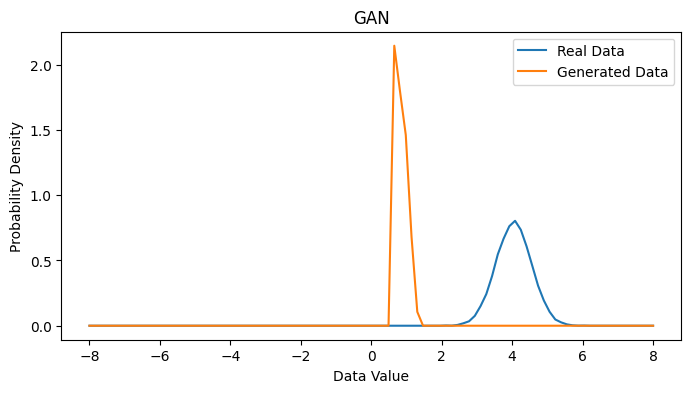

Step 10: D Loss - 1.2883827686309814 G Loss - 0.730539858341217
Step 20: D Loss - 1.194791316986084 G Loss - 0.7607021927833557
Step 30: D Loss - 1.0607959032058716 G Loss - 0.8304056525230408
Step 40: D Loss - 0.8714876174926758 G Loss - 0.9663854241371155
Step 50: D Loss - 0.6686940789222717 G Loss - 1.181372046470642
Step 60: D Loss - 0.504594624042511 G Loss - 1.4464654922485352
Step 70: D Loss - 0.3744429349899292 G Loss - 1.7286137342453003
Step 80: D Loss - 0.3000614643096924 G Loss - 1.9953383207321167
Step 90: D Loss - 0.23641657829284668 G Loss - 2.2376928329467773
Step 100: D Loss - 0.21137547492980957 G Loss - 2.4465813636779785


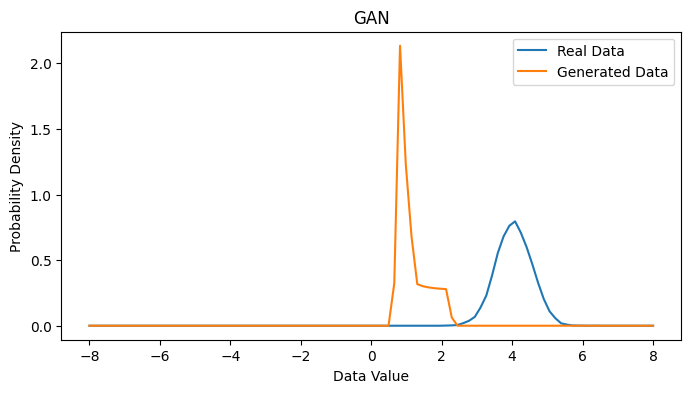

Step 110: D Loss - 0.21427178382873535 G Loss - 2.636617422103882
Step 120: D Loss - 0.2263321578502655 G Loss - 2.790163278579712
Step 130: D Loss - 0.22542718052864075 G Loss - 2.943084955215454
Step 140: D Loss - 0.24507036805152893 G Loss - 3.0381734371185303
Step 150: D Loss - 0.2988830804824829 G Loss - 3.078725576400757
Step 160: D Loss - 0.38867223262786865 G Loss - 3.0654237270355225
Step 170: D Loss - 0.3379419147968292 G Loss - 3.207085609436035
Step 180: D Loss - 0.3725506067276001 G Loss - 3.2164885997772217
Step 190: D Loss - 0.47264528274536133 G Loss - 3.1458778381347656
Step 200: D Loss - 0.5567220449447632 G Loss - 3.053412675857544


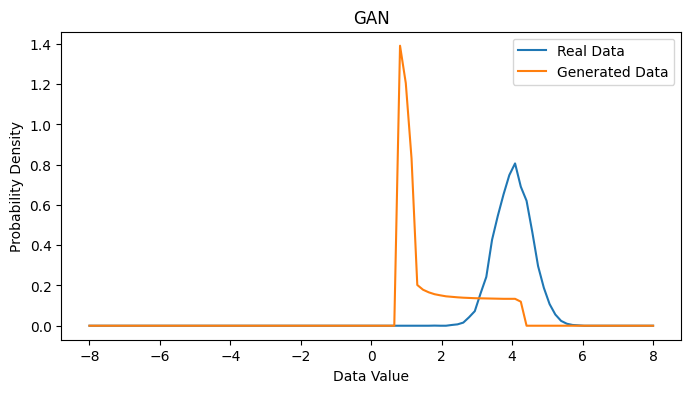

Step 210: D Loss - 0.5623819828033447 G Loss - 3.0340023040771484
Step 220: D Loss - 0.7216278314590454 G Loss - 2.851886034011841
Step 230: D Loss - 0.8068885803222656 G Loss - 2.796438217163086
Step 240: D Loss - 0.7686389684677124 G Loss - 2.753053903579712
Step 250: D Loss - 0.7118707895278931 G Loss - 2.7364540100097656
Step 260: D Loss - 0.7696294784545898 G Loss - 2.633841037750244
Step 270: D Loss - 0.7728447914123535 G Loss - 2.5959486961364746
Step 280: D Loss - 0.8861415386199951 G Loss - 2.485416889190674
Step 290: D Loss - 0.8537540435791016 G Loss - 2.4775383472442627
Step 300: D Loss - 0.7261719703674316 G Loss - 2.5066683292388916


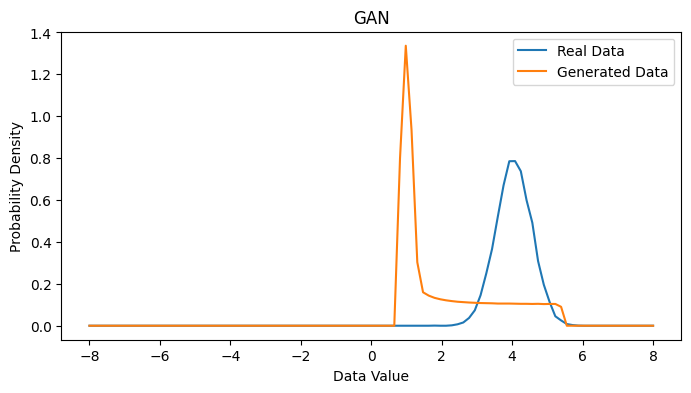

Step 310: D Loss - 0.7873841524124146 G Loss - 2.457707166671753
Step 320: D Loss - 0.786769449710846 G Loss - 2.409602642059326
Step 330: D Loss - 0.7936973571777344 G Loss - 2.4121882915496826
Step 340: D Loss - 0.7633731961250305 G Loss - 2.422795534133911
Step 350: D Loss - 0.7685869932174683 G Loss - 2.3937883377075195
Step 360: D Loss - 0.8430428504943848 G Loss - 2.37906813621521
Step 370: D Loss - 0.8031052350997925 G Loss - 2.383375406265259
Step 380: D Loss - 0.8269491195678711 G Loss - 2.376887083053589
Step 390: D Loss - 0.8333206176757812 G Loss - 2.3684253692626953
Step 400: D Loss - 0.8300089836120605 G Loss - 2.391496419906616


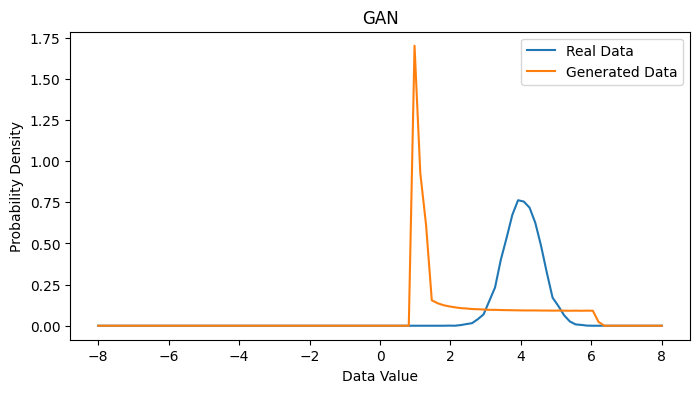

Step 410: D Loss - 0.8088189363479614 G Loss - 2.3934054374694824
Step 420: D Loss - 0.8022905588150024 G Loss - 2.381563425064087
Step 430: D Loss - 0.818500280380249 G Loss - 2.3631093502044678
Step 440: D Loss - 0.8043578863143921 G Loss - 2.3694539070129395
Step 450: D Loss - 0.8606044054031372 G Loss - 2.389012575149536
Step 460: D Loss - 0.8311476707458496 G Loss - 2.3931357860565186
Step 470: D Loss - 0.8540457487106323 G Loss - 2.395184278488159
Step 480: D Loss - 0.8035120964050293 G Loss - 2.4246418476104736
Step 490: D Loss - 0.8051191568374634 G Loss - 2.442490577697754
Step 500: D Loss - 0.8370643854141235 G Loss - 2.403686285018921


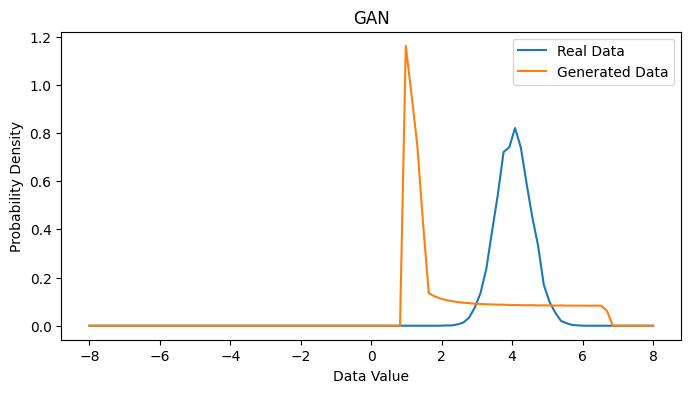

Step 510: D Loss - 0.8231585025787354 G Loss - 2.425837516784668
Step 520: D Loss - 0.8123137950897217 G Loss - 2.4691708087921143
Step 530: D Loss - 0.8371679782867432 G Loss - 2.454901933670044
Step 540: D Loss - 0.8143875598907471 G Loss - 2.47310471534729
Step 550: D Loss - 0.7972276210784912 G Loss - 2.47162127494812
Step 560: D Loss - 0.8159874677658081 G Loss - 2.457746744155884
Step 570: D Loss - 0.8195689916610718 G Loss - 2.4572927951812744
Step 580: D Loss - 0.8037992715835571 G Loss - 2.4518446922302246
Step 590: D Loss - 0.8027255535125732 G Loss - 2.4635136127471924
Step 600: D Loss - 0.8014262914657593 G Loss - 2.4564433097839355


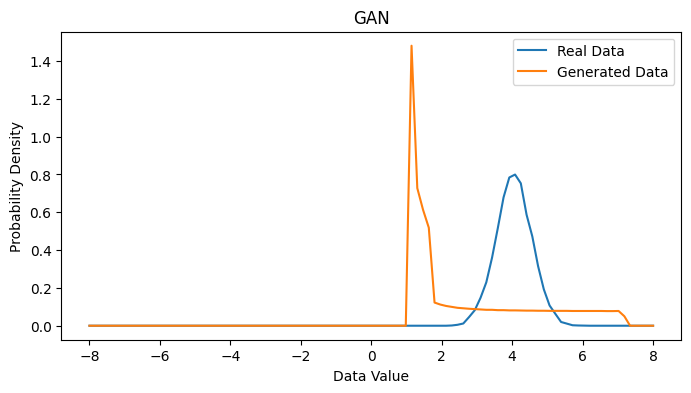

Step 610: D Loss - 0.8086861371994019 G Loss - 2.466761589050293
Step 620: D Loss - 0.8200041651725769 G Loss - 2.4694337844848633
Step 630: D Loss - 0.7963566780090332 G Loss - 2.5152227878570557
Step 640: D Loss - 0.7696816921234131 G Loss - 2.5123159885406494
Step 650: D Loss - 0.7623550891876221 G Loss - 2.550793170928955
Step 660: D Loss - 0.7599667906761169 G Loss - 2.5519447326660156
Step 670: D Loss - 0.7586464881896973 G Loss - 2.510077714920044
Step 680: D Loss - 0.7453510761260986 G Loss - 2.53843092918396
Step 690: D Loss - 0.7289870977401733 G Loss - 2.5210249423980713
Step 700: D Loss - 0.7054084539413452 G Loss - 2.56636381149292


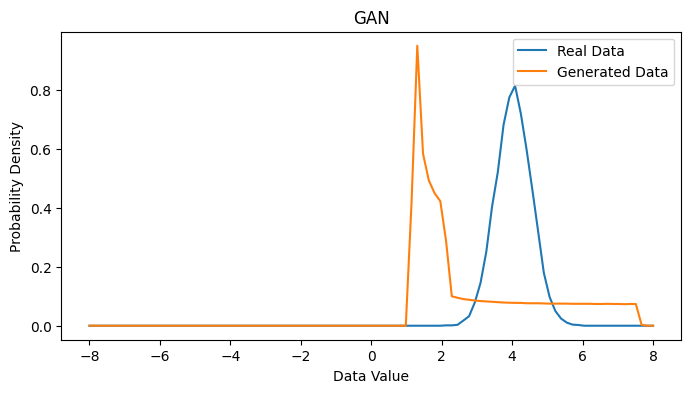

Step 710: D Loss - 0.708416759967804 G Loss - 2.516958713531494
Step 720: D Loss - 0.7138194441795349 G Loss - 2.507366180419922
Step 730: D Loss - 0.7281757593154907 G Loss - 2.3338868618011475
Step 740: D Loss - 0.6660215854644775 G Loss - 2.437629461288452
Step 750: D Loss - 0.7506729364395142 G Loss - 2.1818912029266357
Step 760: D Loss - 0.7631431818008423 G Loss - 2.1311287879943848
Step 770: D Loss - 0.767423689365387 G Loss - 2.1670339107513428
Step 780: D Loss - 0.7333102226257324 G Loss - 2.224902391433716
Step 790: D Loss - 0.7382405996322632 G Loss - 2.212463140487671
Step 800: D Loss - 0.6836881637573242 G Loss - 2.351348638534546


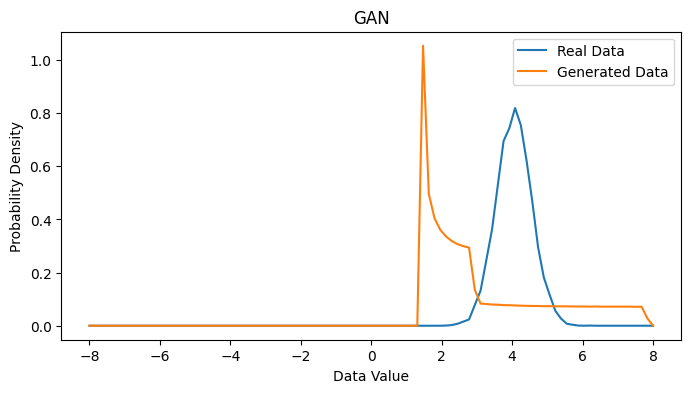

Step 810: D Loss - 0.7619943022727966 G Loss - 2.141495943069458
Step 820: D Loss - 0.7454986572265625 G Loss - 2.1608245372772217
Step 830: D Loss - 0.9648683071136475 G Loss - 1.8248108625411987
Step 840: D Loss - 0.7221272587776184 G Loss - 2.3108396530151367
Step 850: D Loss - 0.7935217022895813 G Loss - 2.0965521335601807
Step 860: D Loss - 0.8801963925361633 G Loss - 1.9265505075454712
Step 870: D Loss - 0.7270690202713013 G Loss - 2.535414695739746
Step 880: D Loss - 1.1155710220336914 G Loss - 2.775710105895996
Step 890: D Loss - 1.05362069606781 G Loss - 2.4623043537139893
Step 900: D Loss - 0.9821053743362427 G Loss - 2.5747103691101074


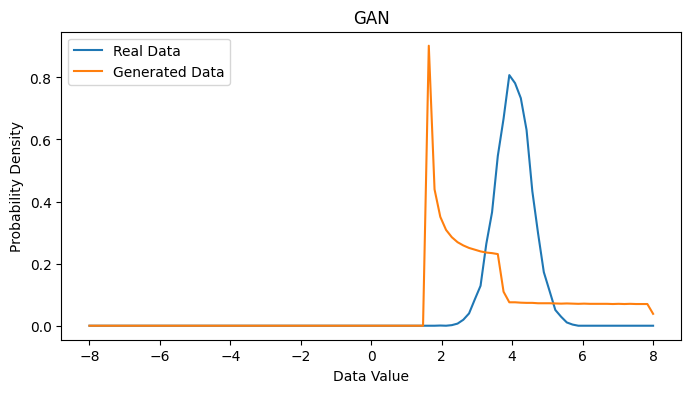

Step 910: D Loss - 0.9284584522247314 G Loss - 2.679006576538086
Step 920: D Loss - 1.0355796813964844 G Loss - 2.3514320850372314
Step 930: D Loss - 0.812130331993103 G Loss - 2.445159912109375
Step 940: D Loss - 0.7976406812667847 G Loss - 2.421271562576294
Step 950: D Loss - 0.7938120365142822 G Loss - 2.1182072162628174
Step 960: D Loss - 0.8192002177238464 G Loss - 2.2603397369384766
Step 970: D Loss - 0.840442419052124 G Loss - 1.8099719285964966
Step 980: D Loss - 0.8338384628295898 G Loss - 1.8896247148513794
Step 990: D Loss - 0.8267529606819153 G Loss - 1.9076123237609863
Step 1000: D Loss - 0.9339269399642944 G Loss - 1.7237606048583984


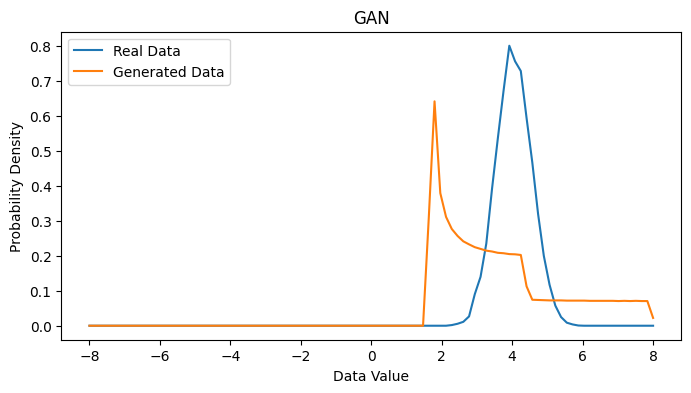

Step 1010: D Loss - 0.9161051511764526 G Loss - 2.32120943069458
Step 1020: D Loss - 1.006531834602356 G Loss - 1.6321169137954712
Step 1030: D Loss - 0.9372150897979736 G Loss - 1.6865273714065552
Step 1040: D Loss - 1.0364153385162354 G Loss - 1.6146217584609985
Step 1050: D Loss - 0.8670355081558228 G Loss - 1.7577747106552124
Step 1060: D Loss - 0.9322929382324219 G Loss - 2.023689031600952
Step 1070: D Loss - 0.8652242422103882 G Loss - 1.8343019485473633
Step 1080: D Loss - 0.8331437706947327 G Loss - 2.0156190395355225
Step 1090: D Loss - 1.0845166444778442 G Loss - 2.385282039642334
Step 1100: D Loss - 0.9998323917388916 G Loss - 2.11542010307312


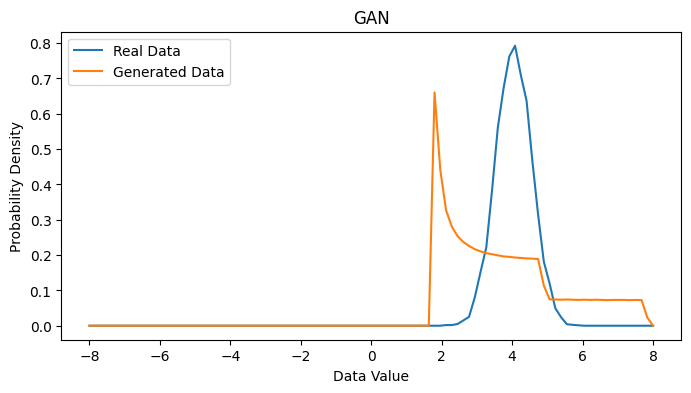

Step 1110: D Loss - 1.0322051048278809 G Loss - 2.1417508125305176
Step 1120: D Loss - 0.9445697069168091 G Loss - 1.6797523498535156
Step 1130: D Loss - 0.8978393077850342 G Loss - 1.698720097541809
Step 1140: D Loss - 0.9655122756958008 G Loss - 1.7398920059204102
Step 1150: D Loss - 0.8829031586647034 G Loss - 1.7840079069137573
Step 1160: D Loss - 0.7661572694778442 G Loss - 2.054086208343506
Step 1170: D Loss - 1.2872267961502075 G Loss - 1.2202651500701904
Step 1180: D Loss - 0.9133794903755188 G Loss - 2.2761037349700928
Step 1190: D Loss - 0.8788117170333862 G Loss - 2.1295981407165527
Step 1200: D Loss - 1.239351511001587 G Loss - 2.0245277881622314


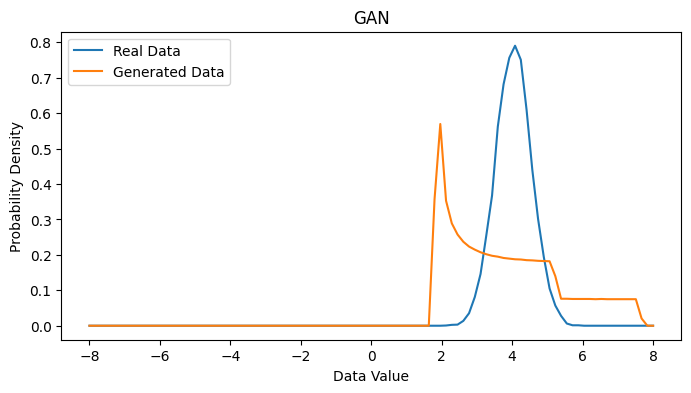

Step 1210: D Loss - 1.23200523853302 G Loss - 2.0629289150238037
Step 1220: D Loss - 0.8756399154663086 G Loss - 2.116006851196289
Step 1230: D Loss - 0.815453290939331 G Loss - 1.9472204446792603
Step 1240: D Loss - 1.0734248161315918 G Loss - 1.6160951852798462
Step 1250: D Loss - 0.9652876257896423 G Loss - 1.856246829032898
Step 1260: D Loss - 0.8654717803001404 G Loss - 1.9120179414749146
Step 1270: D Loss - 0.8087032437324524 G Loss - 1.8785799741744995
Step 1280: D Loss - 0.9598087072372437 G Loss - 2.2993199825286865
Step 1290: D Loss - 0.8169300556182861 G Loss - 2.2399957180023193
Step 1300: D Loss - 0.9213925004005432 G Loss - 1.783577561378479


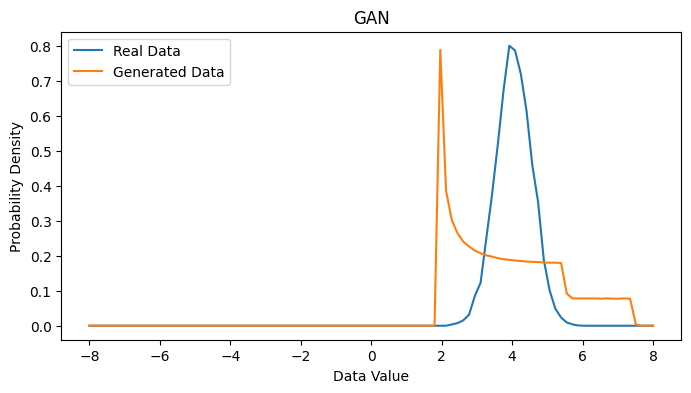

Step 1310: D Loss - 0.8349457383155823 G Loss - 2.42248272895813
Step 1320: D Loss - 0.9243156909942627 G Loss - 1.624534249305725
Step 1330: D Loss - 0.7591871023178101 G Loss - 2.024820566177368
Step 1340: D Loss - 0.9365424513816833 G Loss - 2.366649866104126
Step 1350: D Loss - 1.1012144088745117 G Loss - 2.278809070587158
Step 1360: D Loss - 0.8971565365791321 G Loss - 1.678361415863037
Step 1370: D Loss - 0.922484278678894 G Loss - 1.8119579553604126
Step 1380: D Loss - 0.8846240639686584 G Loss - 2.4461309909820557
Step 1390: D Loss - 0.7801774740219116 G Loss - 2.3012454509735107
Step 1400: D Loss - 1.152252197265625 G Loss - 2.211503744125366


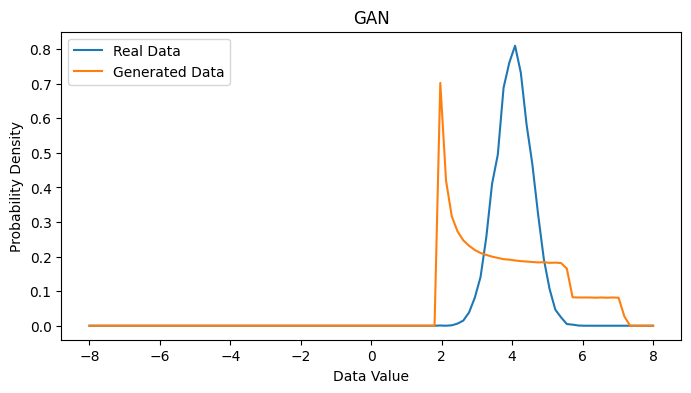

Step 1410: D Loss - 0.8126360177993774 G Loss - 1.8634133338928223
Step 1420: D Loss - 0.9049655199050903 G Loss - 1.7392973899841309
Step 1430: D Loss - 0.9812934398651123 G Loss - 2.2474899291992188
Step 1440: D Loss - 1.004565954208374 G Loss - 2.2258729934692383
Step 1450: D Loss - 0.920015811920166 G Loss - 1.5569705963134766
Step 1460: D Loss - 0.8653110861778259 G Loss - 2.1487655639648438
Step 1470: D Loss - 0.9080985188484192 G Loss - 2.0625722408294678
Step 1480: D Loss - 0.831989049911499 G Loss - 2.2734203338623047
Step 1490: D Loss - 1.1993885040283203 G Loss - 1.9801411628723145
Step 1500: D Loss - 0.9771920442581177 G Loss - 2.0378570556640625


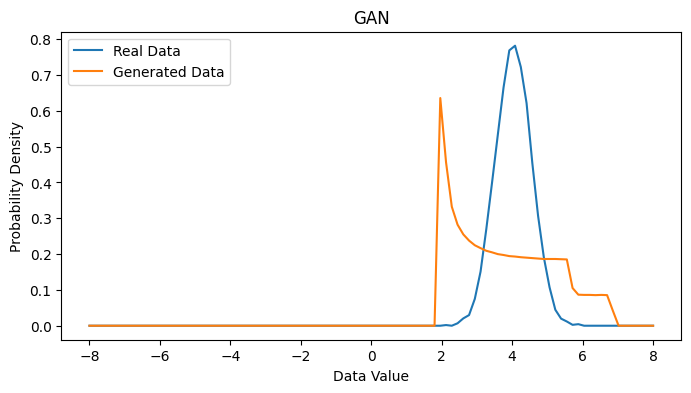

Step 1510: D Loss - 1.148435115814209 G Loss - 1.475222110748291
Step 1520: D Loss - 0.760685920715332 G Loss - 2.2350680828094482
Step 1530: D Loss - 1.11923348903656 G Loss - 1.8719490766525269
Step 1540: D Loss - 1.2265164852142334 G Loss - 1.4233342409133911
Step 1550: D Loss - 1.0692952871322632 G Loss - 2.1633572578430176
Step 1560: D Loss - 0.8855270147323608 G Loss - 1.9861494302749634
Step 1570: D Loss - 0.7552824020385742 G Loss - 2.2493104934692383
Step 1580: D Loss - 0.8684940338134766 G Loss - 1.8806535005569458
Step 1590: D Loss - 1.0281767845153809 G Loss - 2.1246020793914795
Step 1600: D Loss - 0.9191826581954956 G Loss - 1.6624537706375122


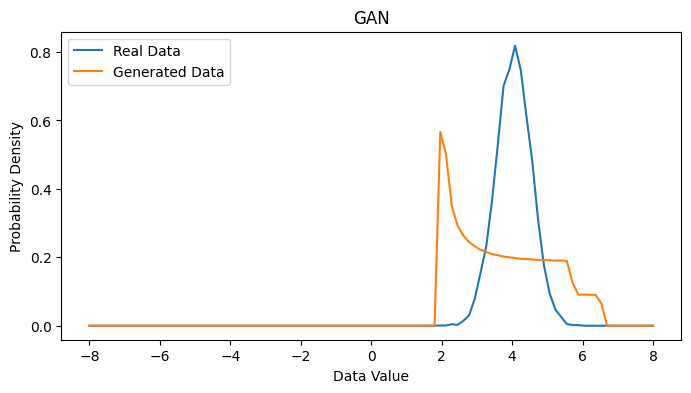

Step 1610: D Loss - 0.8346771597862244 G Loss - 1.947598934173584
Step 1620: D Loss - 0.9066474437713623 G Loss - 1.8092933893203735
Step 1630: D Loss - 0.892105758190155 G Loss - 1.8927159309387207
Step 1640: D Loss - 0.8673015236854553 G Loss - 2.2854976654052734
Step 1650: D Loss - 1.461268424987793 G Loss - 1.3562079668045044
Step 1660: D Loss - 0.7798779606819153 G Loss - 2.0133821964263916
Step 1670: D Loss - 0.9735925197601318 G Loss - 1.9357671737670898
Step 1680: D Loss - 0.9000787138938904 G Loss - 1.9737310409545898
Step 1690: D Loss - 0.9411232471466064 G Loss - 1.803566336631775
Step 1700: D Loss - 0.8478155136108398 G Loss - 1.9871152639389038


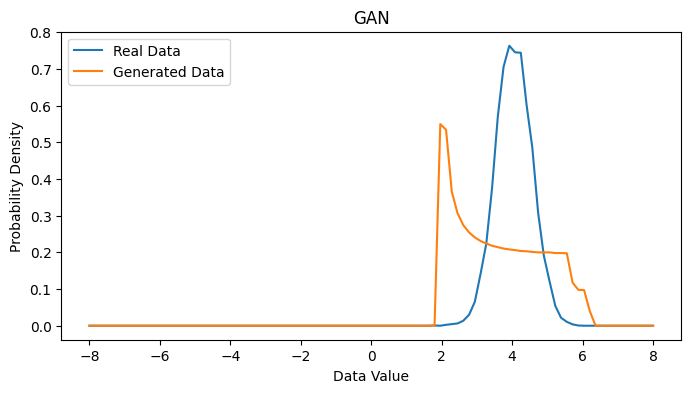

Step 1710: D Loss - 0.8826639652252197 G Loss - 2.0058975219726562
Step 1720: D Loss - 0.8862578272819519 G Loss - 1.7416844367980957
Step 1730: D Loss - 0.8859213590621948 G Loss - 1.8706474304199219
Step 1740: D Loss - 1.0532070398330688 G Loss - 1.986445426940918
Step 1750: D Loss - 0.852571964263916 G Loss - 2.144888401031494
Step 1760: D Loss - 1.0103591680526733 G Loss - 1.9848556518554688
Step 1770: D Loss - 0.9230871796607971 G Loss - 1.7479047775268555
Step 1780: D Loss - 0.9057490825653076 G Loss - 1.707802414894104
Step 1790: D Loss - 1.0932140350341797 G Loss - 1.9972842931747437
Step 1800: D Loss - 0.8749433755874634 G Loss - 1.7967220544815063


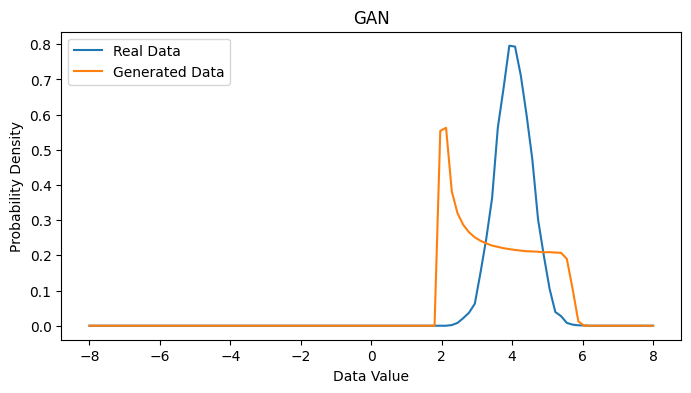

Step 1810: D Loss - 0.8058414459228516 G Loss - 2.1148884296417236
Step 1820: D Loss - 0.9518765211105347 G Loss - 2.0242393016815186
Step 1830: D Loss - 0.8725579977035522 G Loss - 1.8889120817184448
Step 1840: D Loss - 0.9882971048355103 G Loss - 2.045985221862793
Step 1850: D Loss - 1.156472086906433 G Loss - 1.5346397161483765
Step 1860: D Loss - 1.0481419563293457 G Loss - 1.5767887830734253
Step 1870: D Loss - 0.8972340822219849 G Loss - 1.878034234046936
Step 1880: D Loss - 0.8699955940246582 G Loss - 2.018172264099121
Step 1890: D Loss - 1.082979679107666 G Loss - 2.1386430263519287
Step 1900: D Loss - 1.0056554079055786 G Loss - 1.9954725503921509


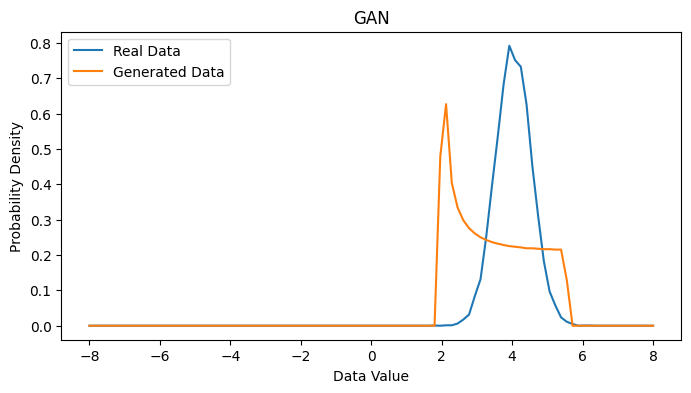

Step 1910: D Loss - 0.8382494449615479 G Loss - 2.012824296951294
Step 1920: D Loss - 0.8251888751983643 G Loss - 2.0083811283111572
Step 1930: D Loss - 1.0302913188934326 G Loss - 1.8530722856521606
Step 1940: D Loss - 0.9634668827056885 G Loss - 1.817605972290039
Step 1950: D Loss - 0.8146175146102905 G Loss - 2.1605632305145264
Step 1960: D Loss - 0.9721835851669312 G Loss - 2.1613121032714844
Step 1970: D Loss - 0.984221875667572 G Loss - 2.1697537899017334
Step 1980: D Loss - 1.084816813468933 G Loss - 1.5882154703140259
Step 1990: D Loss - 1.0867834091186523 G Loss - 1.662244200706482
Step 2000: D Loss - 1.121835470199585 G Loss - 1.9815483093261719


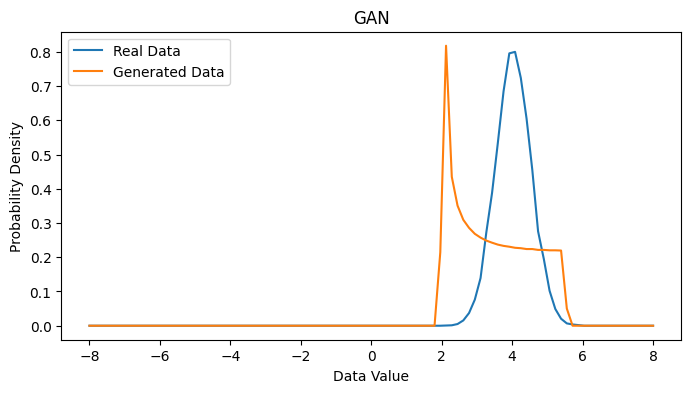

Step 2010: D Loss - 0.9223467111587524 G Loss - 1.8318872451782227
Step 2020: D Loss - 0.9770387411117554 G Loss - 1.8566412925720215
Step 2030: D Loss - 1.0419578552246094 G Loss - 1.9867080450057983
Step 2040: D Loss - 1.1959238052368164 G Loss - 2.0027177333831787
Step 2050: D Loss - 1.0494935512542725 G Loss - 2.1259772777557373
Step 2060: D Loss - 0.8899645805358887 G Loss - 2.0288894176483154
Step 2070: D Loss - 1.0291168689727783 G Loss - 1.9665511846542358
Step 2080: D Loss - 0.8919417858123779 G Loss - 2.043867349624634
Step 2090: D Loss - 0.9384375214576721 G Loss - 2.1073157787323
Step 2100: D Loss - 0.8830227851867676 G Loss - 1.805216670036316


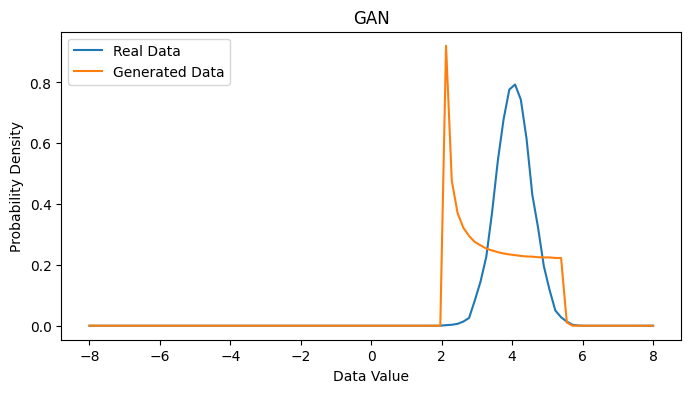

Step 2110: D Loss - 0.969130277633667 G Loss - 1.9337583780288696
Step 2120: D Loss - 0.8644841313362122 G Loss - 2.121255874633789
Step 2130: D Loss - 0.9447749853134155 G Loss - 1.8306388854980469
Step 2140: D Loss - 1.136589765548706 G Loss - 2.018615961074829
Step 2150: D Loss - 0.9694346189498901 G Loss - 1.6543587446212769
Step 2160: D Loss - 1.0452666282653809 G Loss - 1.7715984582901
Step 2170: D Loss - 0.9148634672164917 G Loss - 1.8984198570251465
Step 2180: D Loss - 0.9007080793380737 G Loss - 1.8660030364990234
Step 2190: D Loss - 0.8816149234771729 G Loss - 1.9506949186325073
Step 2200: D Loss - 0.9075156450271606 G Loss - 1.9542269706726074


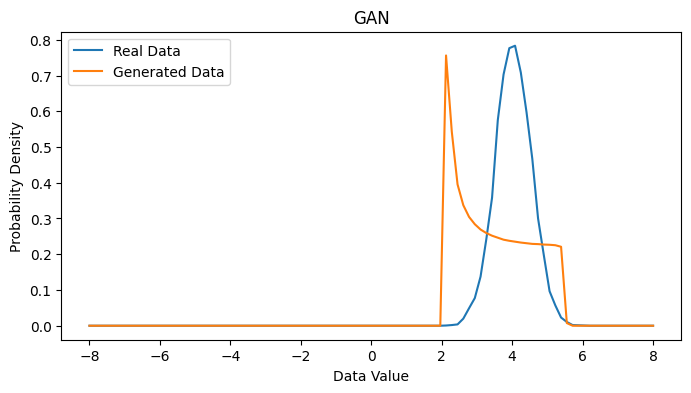

Step 2210: D Loss - 1.279067039489746 G Loss - 1.555537223815918
Step 2220: D Loss - 1.0682494640350342 G Loss - 1.7767080068588257
Step 2230: D Loss - 1.1301792860031128 G Loss - 1.7482422590255737
Step 2240: D Loss - 1.0166120529174805 G Loss - 1.7561084032058716
Step 2250: D Loss - 1.4597182273864746 G Loss - 1.7292217016220093
Step 2260: D Loss - 1.0126769542694092 G Loss - 1.8387945890426636
Step 2270: D Loss - 0.8394731283187866 G Loss - 2.0695998668670654
Step 2280: D Loss - 0.8817553520202637 G Loss - 2.049041509628296
Step 2290: D Loss - 0.9264522790908813 G Loss - 1.750346064567566
Step 2300: D Loss - 0.9283571243286133 G Loss - 2.0527889728546143


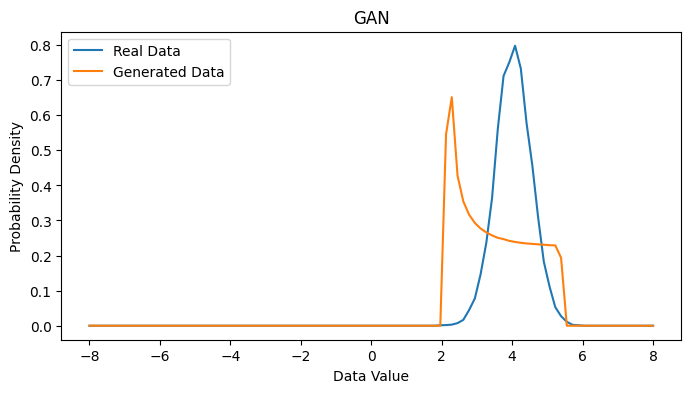

Step 2310: D Loss - 0.8497741222381592 G Loss - 1.9957629442214966
Step 2320: D Loss - 0.848736047744751 G Loss - 1.9240165948867798
Step 2330: D Loss - 0.9544470906257629 G Loss - 2.070784091949463
Step 2340: D Loss - 0.9651613235473633 G Loss - 1.7316561937332153
Step 2350: D Loss - 1.0407214164733887 G Loss - 1.6608136892318726
Step 2360: D Loss - 1.1021394729614258 G Loss - 1.6340842247009277
Step 2370: D Loss - 1.0446072816848755 G Loss - 1.488531470298767
Step 2380: D Loss - 0.8762102127075195 G Loss - 1.8427056074142456
Step 2390: D Loss - 0.952885627746582 G Loss - 1.6913310289382935
Step 2400: D Loss - 0.9725409746170044 G Loss - 1.8066848516464233


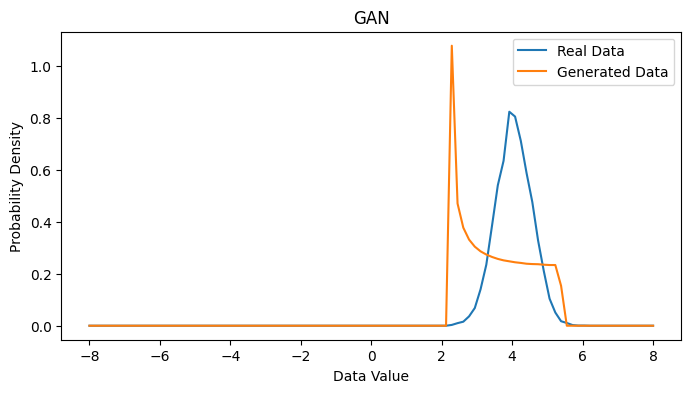

Step 2410: D Loss - 1.1690775156021118 G Loss - 1.3658074140548706
Step 2420: D Loss - 0.9601032733917236 G Loss - 1.8432375192642212
Step 2430: D Loss - 1.0401341915130615 G Loss - 1.588917851448059
Step 2440: D Loss - 1.3024547100067139 G Loss - 1.4810866117477417
Step 2450: D Loss - 1.1541481018066406 G Loss - 1.478885531425476
Step 2460: D Loss - 0.9756659269332886 G Loss - 1.6675728559494019
Step 2470: D Loss - 1.3893077373504639 G Loss - 1.5638312101364136
Step 2480: D Loss - 0.8665763735771179 G Loss - 1.8796706199645996
Step 2490: D Loss - 1.0518267154693604 G Loss - 1.5669442415237427
Step 2500: D Loss - 0.9871225357055664 G Loss - 1.7567211389541626


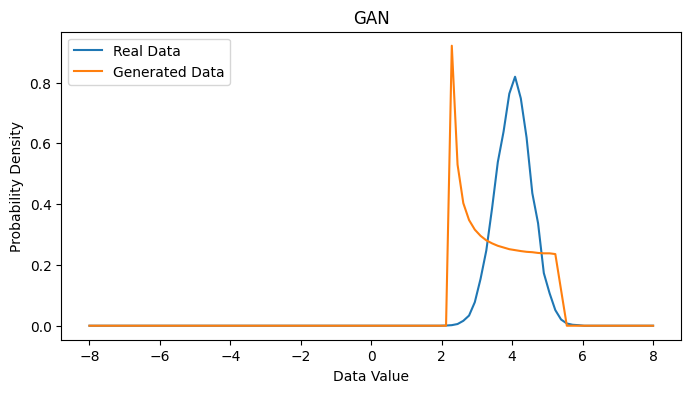

Step 2510: D Loss - 0.9711023569107056 G Loss - 1.7312010526657104
Step 2520: D Loss - 0.8890547752380371 G Loss - 1.716295599937439
Step 2530: D Loss - 1.0039737224578857 G Loss - 1.7847169637680054
Step 2540: D Loss - 0.8777817487716675 G Loss - 1.8292908668518066
Step 2550: D Loss - 1.062517762184143 G Loss - 1.792811393737793
Step 2560: D Loss - 1.0134872198104858 G Loss - 1.839929223060608
Step 2570: D Loss - 0.8804380297660828 G Loss - 1.8737611770629883
Step 2580: D Loss - 1.0608789920806885 G Loss - 1.5929890871047974
Step 2590: D Loss - 1.086139440536499 G Loss - 1.6486868858337402
Step 2600: D Loss - 1.0230584144592285 G Loss - 1.6309752464294434


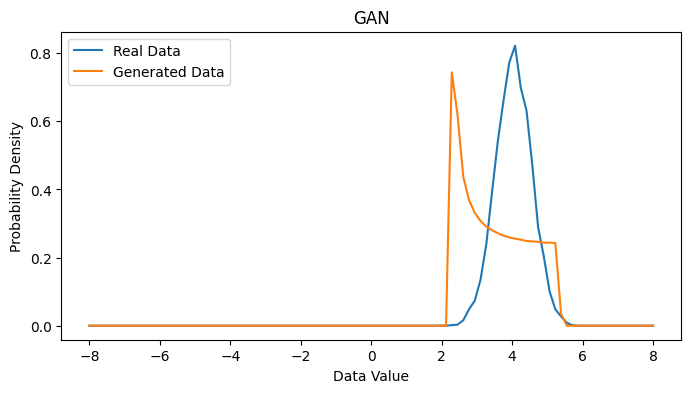

Step 2610: D Loss - 0.9095079898834229 G Loss - 1.85354745388031
Step 2620: D Loss - 0.8996315002441406 G Loss - 1.8676233291625977
Step 2630: D Loss - 1.0723844766616821 G Loss - 1.5635780096054077
Step 2640: D Loss - 1.0116215944290161 G Loss - 1.8023070096969604
Step 2650: D Loss - 0.9781026840209961 G Loss - 1.5818982124328613
Step 2660: D Loss - 1.0439324378967285 G Loss - 1.6975048780441284
Step 2670: D Loss - 0.9819191694259644 G Loss - 1.7302799224853516
Step 2680: D Loss - 0.9256166219711304 G Loss - 1.7873719930648804
Step 2690: D Loss - 0.9714979529380798 G Loss - 1.6565033197402954
Step 2700: D Loss - 1.1411783695220947 G Loss - 1.6746221780776978


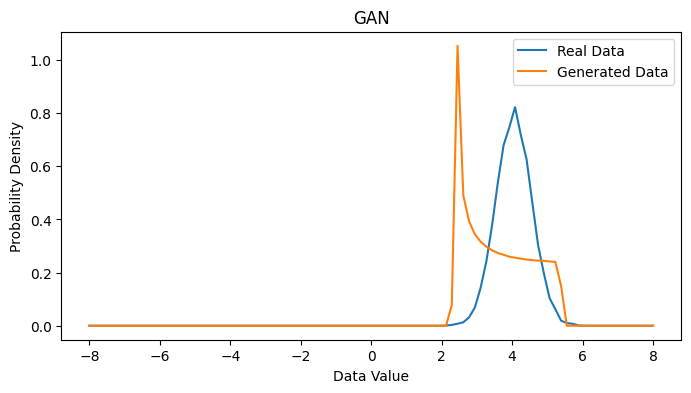

Step 2710: D Loss - 1.112809181213379 G Loss - 1.6654762029647827
Step 2720: D Loss - 1.0014934539794922 G Loss - 1.5400532484054565
Step 2730: D Loss - 1.0177083015441895 G Loss - 1.688614845275879
Step 2740: D Loss - 1.0285598039627075 G Loss - 1.6265548467636108
Step 2750: D Loss - 0.9170939922332764 G Loss - 1.7710014581680298
Step 2760: D Loss - 1.2182183265686035 G Loss - 1.4389910697937012
Step 2770: D Loss - 1.152951955795288 G Loss - 1.5091943740844727
Step 2780: D Loss - 1.073319673538208 G Loss - 1.4266637563705444
Step 2790: D Loss - 1.005477786064148 G Loss - 1.704330325126648
Step 2800: D Loss - 1.0064138174057007 G Loss - 1.7292213439941406


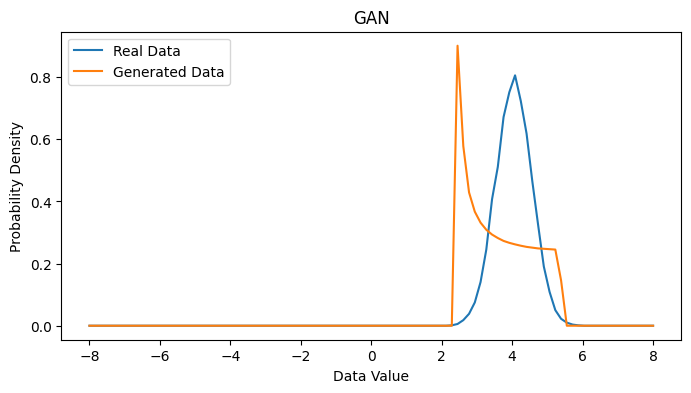

Step 2810: D Loss - 0.930996835231781 G Loss - 1.8190218210220337
Step 2820: D Loss - 0.9498136043548584 G Loss - 1.7284618616104126
Step 2830: D Loss - 1.2763121128082275 G Loss - 1.415360927581787
Step 2840: D Loss - 0.9012291431427002 G Loss - 1.8801475763320923
Step 2850: D Loss - 0.9484450817108154 G Loss - 1.741479516029358
Step 2860: D Loss - 1.0157588720321655 G Loss - 1.6656967401504517
Step 2870: D Loss - 1.011352300643921 G Loss - 1.6414200067520142
Step 2880: D Loss - 0.9826899766921997 G Loss - 1.5560888051986694
Step 2890: D Loss - 1.2530574798583984 G Loss - 1.4070568084716797
Step 2900: D Loss - 1.1765552759170532 G Loss - 1.5424100160598755


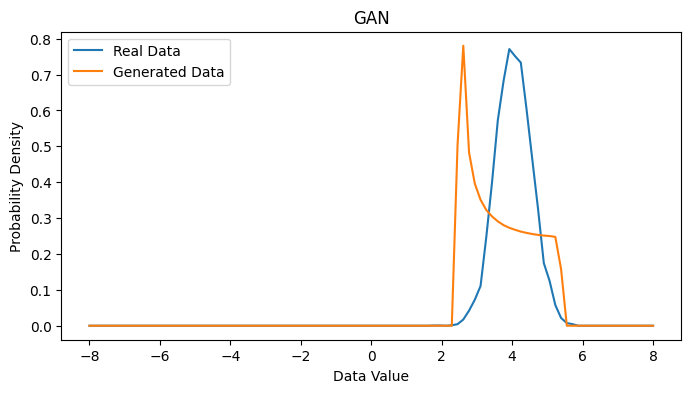

Step 2910: D Loss - 1.2023658752441406 G Loss - 1.4351601600646973
Step 2920: D Loss - 0.958784818649292 G Loss - 1.6223500967025757
Step 2930: D Loss - 1.1116598844528198 G Loss - 1.401589274406433
Step 2940: D Loss - 1.291837215423584 G Loss - 1.3160561323165894
Step 2950: D Loss - 0.9472163915634155 G Loss - 1.5431219339370728
Step 2960: D Loss - 0.9958699941635132 G Loss - 1.4808624982833862
Step 2970: D Loss - 0.9705061912536621 G Loss - 1.5870088338851929
Step 2980: D Loss - 1.132260799407959 G Loss - 1.4214211702346802
Step 2990: D Loss - 0.9760240316390991 G Loss - 1.6929394006729126
Step 3000: D Loss - 0.9820232391357422 G Loss - 1.6100882291793823


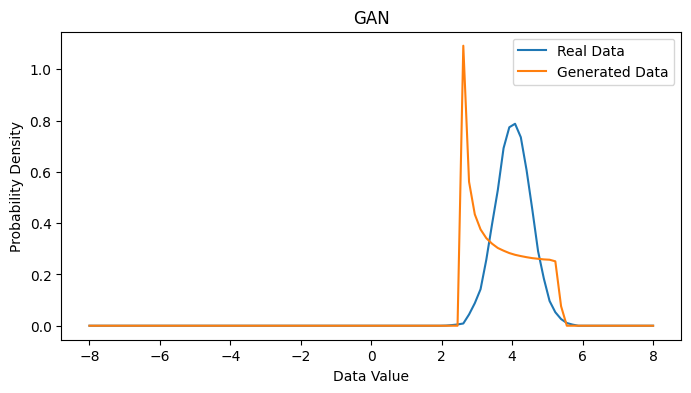

Step 3010: D Loss - 1.280638575553894 G Loss - 1.3918300867080688
Step 3020: D Loss - 0.9469295740127563 G Loss - 1.6321635246276855
Step 3030: D Loss - 0.9543174505233765 G Loss - 1.559055209159851
Step 3040: D Loss - 1.1248589754104614 G Loss - 1.4999403953552246
Step 3050: D Loss - 1.1200857162475586 G Loss - 1.4142789840698242
Step 3060: D Loss - 0.9207128882408142 G Loss - 1.6201618909835815
Step 3070: D Loss - 1.062746524810791 G Loss - 1.3155901432037354
Step 3080: D Loss - 1.295892357826233 G Loss - 1.3077656030654907
Step 3090: D Loss - 1.124199390411377 G Loss - 1.3990095853805542
Step 3100: D Loss - 1.1338547468185425 G Loss - 1.18624746799469


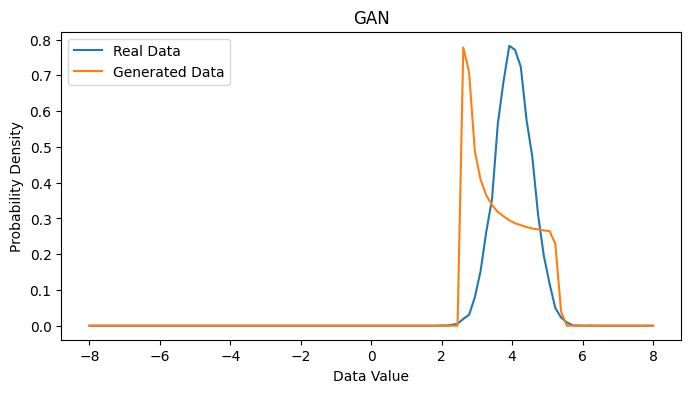

Step 3110: D Loss - 0.9251413941383362 G Loss - 1.4720735549926758
Step 3120: D Loss - 0.9790487885475159 G Loss - 1.477344036102295
Step 3130: D Loss - 1.2585818767547607 G Loss - 1.3870970010757446
Step 3140: D Loss - 1.0855071544647217 G Loss - 1.2719701528549194
Step 3150: D Loss - 0.9719600677490234 G Loss - 1.4942227602005005
Step 3160: D Loss - 0.9554286003112793 G Loss - 1.542128562927246
Step 3170: D Loss - 1.246772050857544 G Loss - 1.3892542123794556
Step 3180: D Loss - 1.0462802648544312 G Loss - 1.3198246955871582
Step 3190: D Loss - 1.253671646118164 G Loss - 1.143591046333313
Step 3200: D Loss - 1.0795090198516846 G Loss - 1.4068833589553833


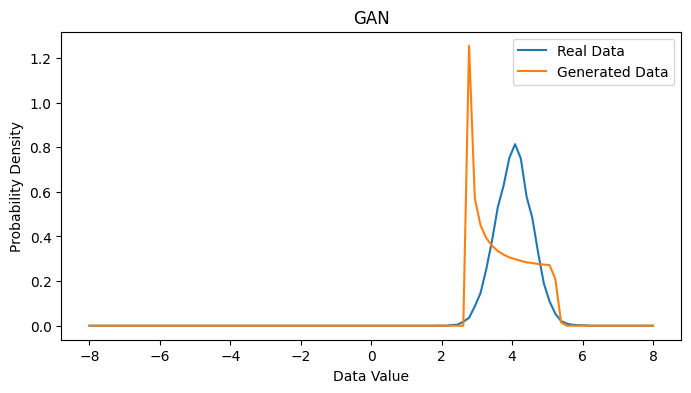

Step 3210: D Loss - 1.0164618492126465 G Loss - 1.4433579444885254
Step 3220: D Loss - 1.0301499366760254 G Loss - 1.4057406187057495
Step 3230: D Loss - 1.08558189868927 G Loss - 1.2348507642745972
Step 3240: D Loss - 1.190288782119751 G Loss - 1.2514601945877075
Step 3250: D Loss - 0.9835346937179565 G Loss - 1.3770956993103027
Step 3260: D Loss - 1.164844036102295 G Loss - 1.2235475778579712
Step 3270: D Loss - 1.0436571836471558 G Loss - 1.3681120872497559
Step 3280: D Loss - 0.9672553539276123 G Loss - 1.4099832773208618
Step 3290: D Loss - 1.096102237701416 G Loss - 1.2801282405853271
Step 3300: D Loss - 1.0992717742919922 G Loss - 1.232904314994812


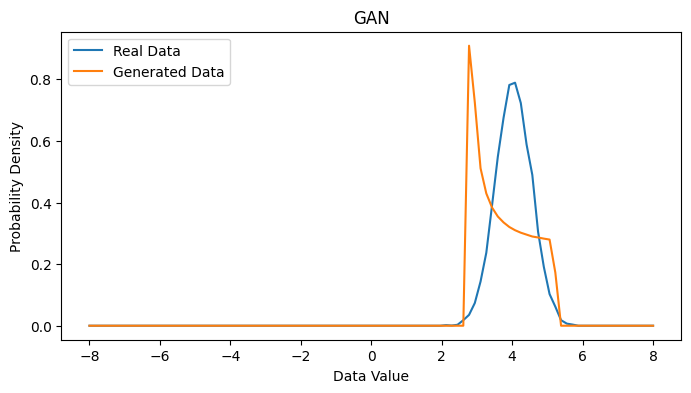

Step 3310: D Loss - 1.1546897888183594 G Loss - 1.2041133642196655
Step 3320: D Loss - 1.1399329900741577 G Loss - 1.2449769973754883
Step 3330: D Loss - 1.5653343200683594 G Loss - 1.167280912399292
Step 3340: D Loss - 1.08358895778656 G Loss - 1.208974003791809
Step 3350: D Loss - 0.9993070363998413 G Loss - 1.3467382192611694
Step 3360: D Loss - 1.0215004682540894 G Loss - 1.334421157836914
Step 3370: D Loss - 1.4556770324707031 G Loss - 1.103927493095398
Step 3380: D Loss - 1.04500412940979 G Loss - 1.2708344459533691
Step 3390: D Loss - 1.181074619293213 G Loss - 1.1219362020492554
Step 3400: D Loss - 1.293349266052246 G Loss - 0.993996798992157


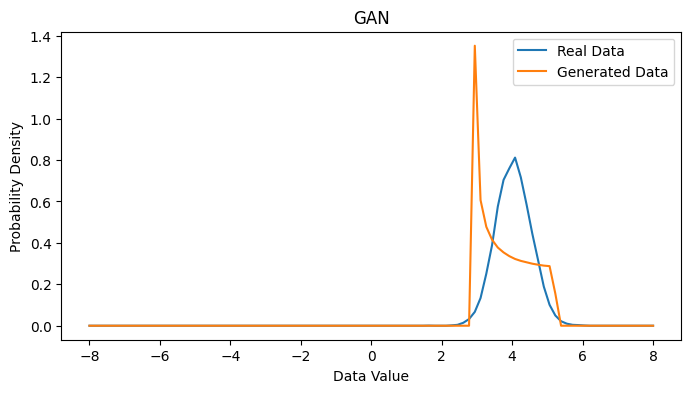

Step 3410: D Loss - 1.1430913209915161 G Loss - 1.165460467338562
Step 3420: D Loss - 1.0544419288635254 G Loss - 1.249705195426941
Step 3430: D Loss - 1.150828242301941 G Loss - 1.1828408241271973
Step 3440: D Loss - 1.1715266704559326 G Loss - 1.0761706829071045
Step 3450: D Loss - 1.2535603046417236 G Loss - 1.0800986289978027
Step 3460: D Loss - 1.241264820098877 G Loss - 0.986960232257843
Step 3470: D Loss - 1.1360307931900024 G Loss - 1.1488977670669556
Step 3480: D Loss - 1.057043194770813 G Loss - 1.1928902864456177
Step 3490: D Loss - 1.0615309476852417 G Loss - 1.1765341758728027
Step 3500: D Loss - 1.0196878910064697 G Loss - 1.2324862480163574


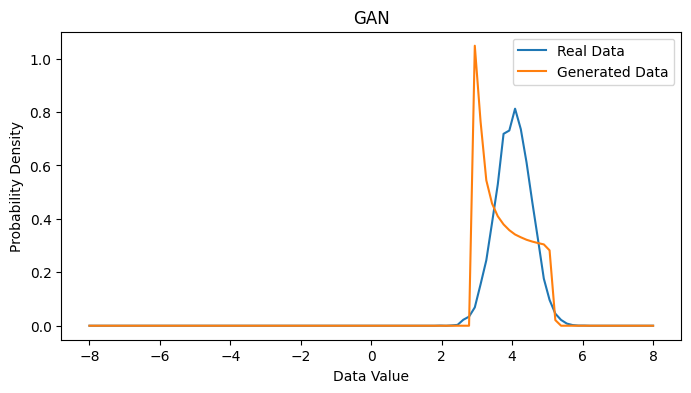

Step 3510: D Loss - 1.1880202293395996 G Loss - 1.0368040800094604
Step 3520: D Loss - 1.2124996185302734 G Loss - 1.0265388488769531
Step 3530: D Loss - 1.2039629220962524 G Loss - 1.1048773527145386
Step 3540: D Loss - 1.2749497890472412 G Loss - 0.9934179782867432
Step 3550: D Loss - 1.1674506664276123 G Loss - 1.0875054597854614
Step 3560: D Loss - 1.2184572219848633 G Loss - 0.976478636264801
Step 3570: D Loss - 1.392601490020752 G Loss - 0.9003189206123352
Step 3580: D Loss - 1.127042531967163 G Loss - 1.0640878677368164
Step 3590: D Loss - 1.1224058866500854 G Loss - 1.0922044515609741
Step 3600: D Loss - 1.7687654495239258 G Loss - 0.81577467918396


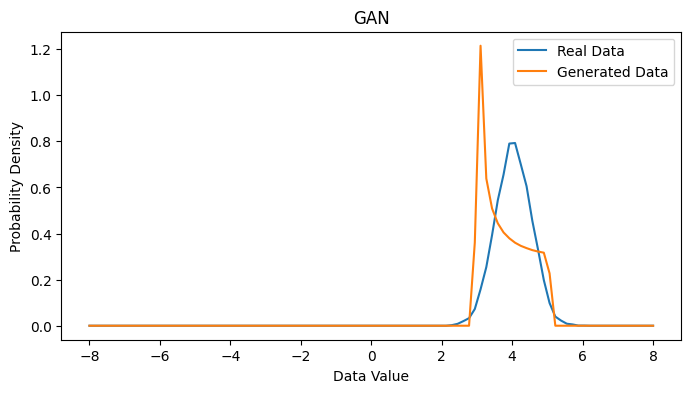

Step 3610: D Loss - 1.1730642318725586 G Loss - 1.0177901983261108
Step 3620: D Loss - 1.1844276189804077 G Loss - 0.9915520548820496
Step 3630: D Loss - 1.2937465906143188 G Loss - 1.053870677947998
Step 3640: D Loss - 1.1913177967071533 G Loss - 1.0222982168197632
Step 3650: D Loss - 1.1812838315963745 G Loss - 1.0327194929122925
Step 3660: D Loss - 1.1291379928588867 G Loss - 1.088421106338501
Step 3670: D Loss - 1.25762939453125 G Loss - 0.9326184391975403
Step 3680: D Loss - 1.3747014999389648 G Loss - 0.7962811589241028
Step 3690: D Loss - 1.149036169052124 G Loss - 1.0401225090026855
Step 3700: D Loss - 1.565471887588501 G Loss - 0.918978214263916


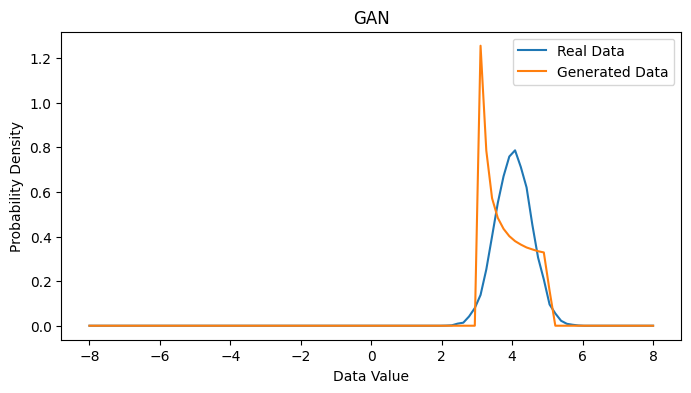

Step 3710: D Loss - 1.234475016593933 G Loss - 0.9209871292114258
Step 3720: D Loss - 1.2918514013290405 G Loss - 0.9355478882789612
Step 3730: D Loss - 1.3203611373901367 G Loss - 0.8545563220977783
Step 3740: D Loss - 1.3835804462432861 G Loss - 0.7641534805297852
Step 3750: D Loss - 1.1594443321228027 G Loss - 1.0513266324996948
Step 3760: D Loss - 1.436697006225586 G Loss - 0.8061745762825012
Step 3770: D Loss - 1.1648309230804443 G Loss - 1.0323482751846313
Step 3780: D Loss - 1.5126910209655762 G Loss - 0.9144291877746582
Step 3790: D Loss - 1.2155083417892456 G Loss - 1.0000306367874146
Step 3800: D Loss - 1.18723464012146 G Loss - 0.9966943860054016


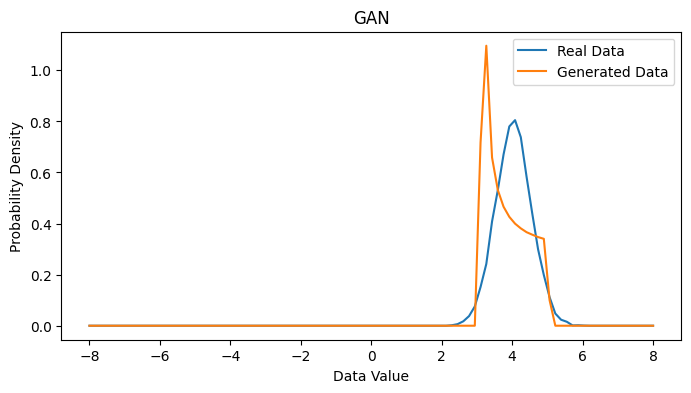

Step 3810: D Loss - 1.3142461776733398 G Loss - 0.9758335947990417
Step 3820: D Loss - 1.3018343448638916 G Loss - 0.884199857711792
Step 3830: D Loss - 1.4715471267700195 G Loss - 0.8433036804199219
Step 3840: D Loss - 1.2547099590301514 G Loss - 0.9286015629768372
Step 3850: D Loss - 1.394260048866272 G Loss - 0.8431141376495361
Step 3860: D Loss - 1.4593133926391602 G Loss - 0.8204169273376465
Step 3870: D Loss - 1.2114522457122803 G Loss - 0.9314870238304138
Step 3880: D Loss - 1.4116590023040771 G Loss - 0.7547402381896973
Step 3890: D Loss - 1.265865445137024 G Loss - 0.8838951587677002
Step 3900: D Loss - 1.3222763538360596 G Loss - 0.8379529118537903


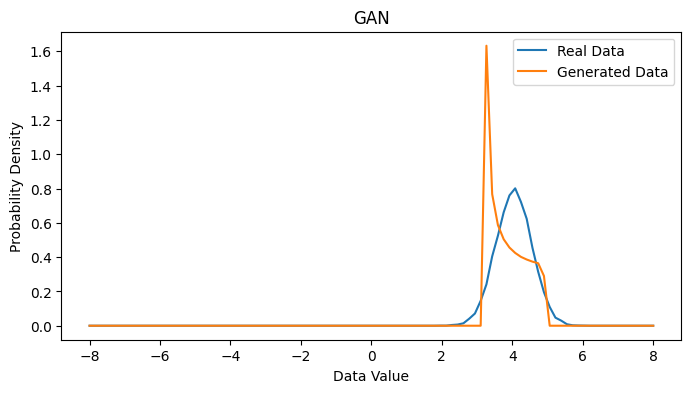

Step 3910: D Loss - 1.3882858753204346 G Loss - 0.8275367617607117
Step 3920: D Loss - 1.4384742975234985 G Loss - 0.8289222121238708
Step 3930: D Loss - 1.1885052919387817 G Loss - 0.9241095185279846
Step 3940: D Loss - 1.4272937774658203 G Loss - 0.806446373462677
Step 3950: D Loss - 1.3780615329742432 G Loss - 0.7928955554962158
Step 3960: D Loss - 1.2753829956054688 G Loss - 0.8943646550178528
Step 3970: D Loss - 1.430377721786499 G Loss - 0.7341899871826172
Step 3980: D Loss - 1.305354118347168 G Loss - 0.8233373165130615
Step 3990: D Loss - 1.5675156116485596 G Loss - 0.7500901818275452
Step 4000: D Loss - 1.3519985675811768 G Loss - 0.8629445433616638


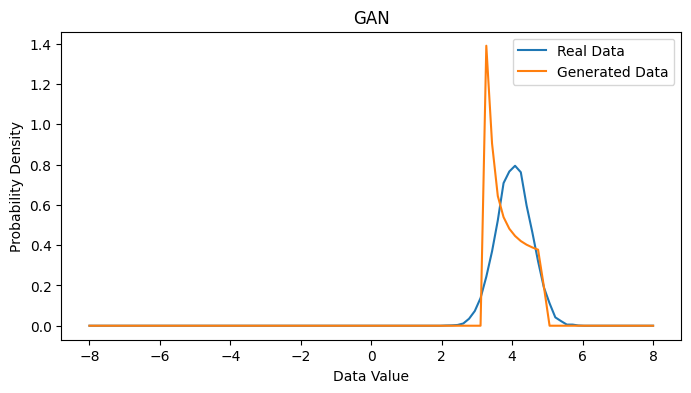

Step 4010: D Loss - 1.4041532278060913 G Loss - 0.8241830468177795
Step 4020: D Loss - 1.2767529487609863 G Loss - 0.8274518847465515
Step 4030: D Loss - 1.2523608207702637 G Loss - 0.8778508305549622
Step 4040: D Loss - 1.3743295669555664 G Loss - 0.7778799533843994
Step 4050: D Loss - 1.3151121139526367 G Loss - 0.7923378944396973
Step 4060: D Loss - 1.5186009407043457 G Loss - 0.7403114438056946
Step 4070: D Loss - 1.3628860712051392 G Loss - 0.7722728252410889
Step 4080: D Loss - 1.3631242513656616 G Loss - 0.7565796375274658
Step 4090: D Loss - 1.3505806922912598 G Loss - 0.7645821571350098
Step 4100: D Loss - 1.288631558418274 G Loss - 0.7897742390632629


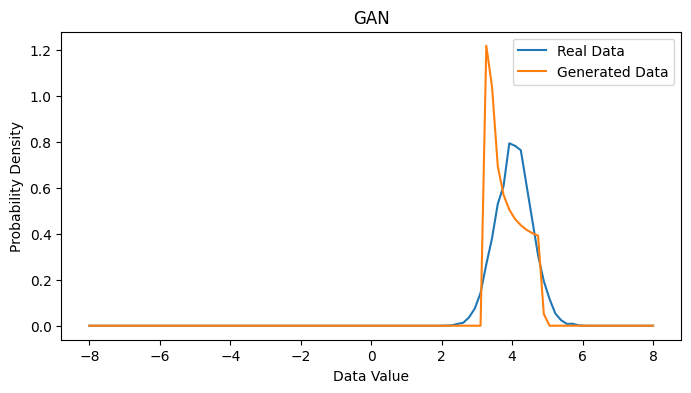

Step 4110: D Loss - 1.3760539293289185 G Loss - 0.745185375213623
Step 4120: D Loss - 1.4331870079040527 G Loss - 0.7313852906227112
Step 4130: D Loss - 1.3829801082611084 G Loss - 0.7070452570915222
Step 4140: D Loss - 1.2501978874206543 G Loss - 0.7920513153076172
Step 4150: D Loss - 1.2861807346343994 G Loss - 0.7797985076904297
Step 4160: D Loss - 1.2588038444519043 G Loss - 0.7948656678199768
Step 4170: D Loss - 1.3968379497528076 G Loss - 0.7460187077522278
Step 4180: D Loss - 1.3767882585525513 G Loss - 0.8155834078788757
Step 4190: D Loss - 1.197106957435608 G Loss - 0.8548782467842102
Step 4200: D Loss - 1.4254789352416992 G Loss - 0.7464551329612732


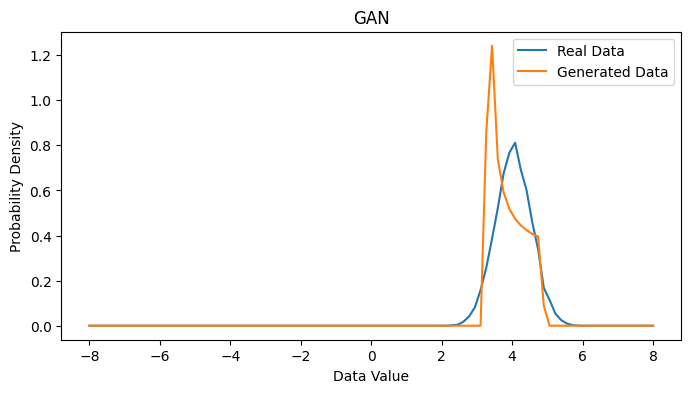

Step 4210: D Loss - 1.3618218898773193 G Loss - 0.7795072197914124
Step 4220: D Loss - 1.2057894468307495 G Loss - 0.850817859172821
Step 4230: D Loss - 1.3288588523864746 G Loss - 0.7692055106163025
Step 4240: D Loss - 1.360666275024414 G Loss - 0.748293936252594
Step 4250: D Loss - 1.379612684249878 G Loss - 0.7558040618896484
Step 4260: D Loss - 1.4431471824645996 G Loss - 0.7267072200775146
Step 4270: D Loss - 1.485945701599121 G Loss - 0.7188071608543396
Step 4280: D Loss - 1.3856844902038574 G Loss - 0.7371941208839417
Step 4290: D Loss - 1.34884774684906 G Loss - 0.7497822642326355
Step 4300: D Loss - 1.355920433998108 G Loss - 0.7419183254241943


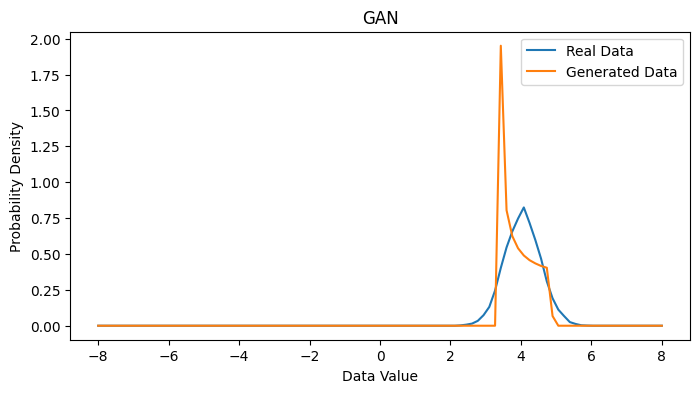

Step 4310: D Loss - 1.4413552284240723 G Loss - 0.7405423521995544
Step 4320: D Loss - 1.3625576496124268 G Loss - 0.7190494537353516
Step 4330: D Loss - 1.3535192012786865 G Loss - 0.7375405430793762
Step 4340: D Loss - 1.3546147346496582 G Loss - 0.709452211856842
Step 4350: D Loss - 1.3254797458648682 G Loss - 0.7380669116973877
Step 4360: D Loss - 1.3523945808410645 G Loss - 0.7283273339271545
Step 4370: D Loss - 1.289888620376587 G Loss - 0.7249831557273865
Step 4380: D Loss - 1.3187099695205688 G Loss - 0.754594087600708
Step 4390: D Loss - 1.418393611907959 G Loss - 0.7008826732635498
Step 4400: D Loss - 1.314396619796753 G Loss - 0.7731818556785583


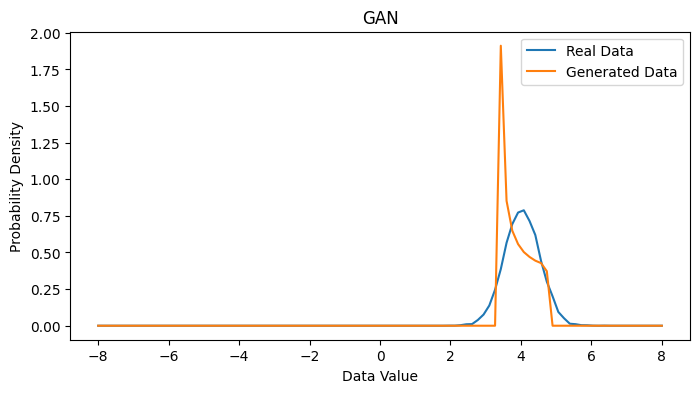

Step 4410: D Loss - 1.3359529972076416 G Loss - 0.7333231568336487
Step 4420: D Loss - 1.3011689186096191 G Loss - 0.7179558873176575
Step 4430: D Loss - 1.2552987337112427 G Loss - 0.8241155743598938
Step 4440: D Loss - 1.4472466707229614 G Loss - 0.6784415245056152
Step 4450: D Loss - 1.283984661102295 G Loss - 0.7921344637870789
Step 4460: D Loss - 1.3103761672973633 G Loss - 0.8759934902191162
Step 4470: D Loss - 1.3511238098144531 G Loss - 0.8584000468254089
Step 4480: D Loss - 1.4058237075805664 G Loss - 0.7064166069030762
Step 4490: D Loss - 1.3552532196044922 G Loss - 0.7585511207580566
Step 4500: D Loss - 1.3606584072113037 G Loss - 0.7547679543495178


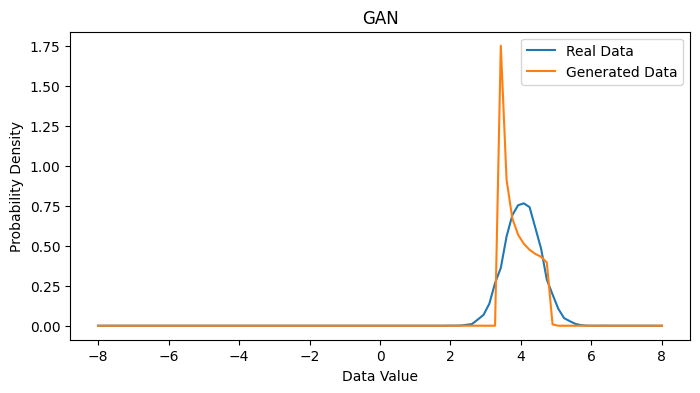

Step 4510: D Loss - 1.3531768321990967 G Loss - 0.7774514555931091
Step 4520: D Loss - 1.3325438499450684 G Loss - 0.7689025402069092
Step 4530: D Loss - 1.3749134540557861 G Loss - 0.7862889170646667
Step 4540: D Loss - 1.3508937358856201 G Loss - 0.753391444683075
Step 4550: D Loss - 1.2979243993759155 G Loss - 0.8852892518043518
Step 4560: D Loss - 1.3265430927276611 G Loss - 0.8301567435264587
Step 4570: D Loss - 1.33599054813385 G Loss - 0.6381953954696655
Step 4580: D Loss - 1.4123201370239258 G Loss - 0.8170145153999329
Step 4590: D Loss - 1.382308006286621 G Loss - 0.6843750476837158
Step 4600: D Loss - 1.326430320739746 G Loss - 0.7317853569984436


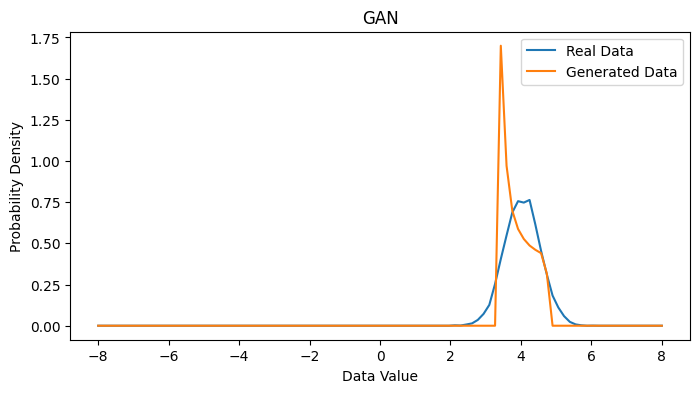

Step 4610: D Loss - 1.2953593730926514 G Loss - 0.7038730978965759
Step 4620: D Loss - 1.3752033710479736 G Loss - 0.5730137228965759
Step 4630: D Loss - 1.4399902820587158 G Loss - 0.8095526695251465
Step 4640: D Loss - 1.3209929466247559 G Loss - 0.7894993424415588
Step 4650: D Loss - 1.438338041305542 G Loss - 0.7299854755401611
Step 4660: D Loss - 1.3541890382766724 G Loss - 0.7150693535804749
Step 4670: D Loss - 1.4052085876464844 G Loss - 0.8744375705718994
Step 4680: D Loss - 1.327796459197998 G Loss - 0.8733008503913879
Step 4690: D Loss - 1.3435646295547485 G Loss - 0.8114645481109619
Step 4700: D Loss - 1.2940926551818848 G Loss - 0.819294273853302


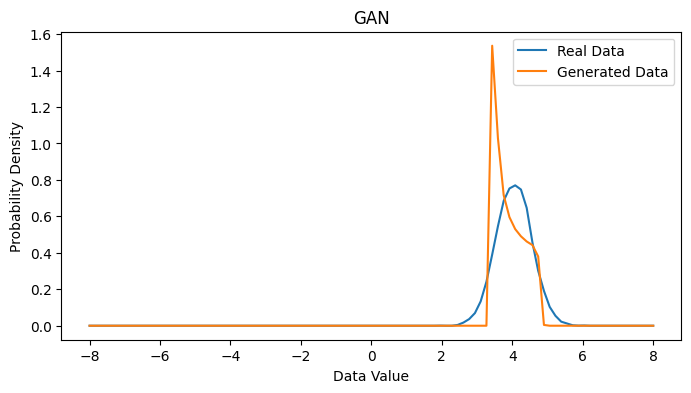

Step 4710: D Loss - 1.24337899684906 G Loss - 0.8455091118812561
Step 4720: D Loss - 1.3740899562835693 G Loss - 0.6418060660362244
Step 4730: D Loss - 1.3894580602645874 G Loss - 0.6834568381309509
Step 4740: D Loss - 1.382115364074707 G Loss - 0.6958362460136414
Step 4750: D Loss - 1.3367784023284912 G Loss - 0.8436080813407898
Step 4760: D Loss - 1.3594766855239868 G Loss - 0.7398622632026672
Step 4770: D Loss - 1.3544328212738037 G Loss - 0.7023109793663025
Step 4780: D Loss - 1.4319545030593872 G Loss - 0.5616148114204407
Step 4790: D Loss - 1.3722820281982422 G Loss - 0.8513414263725281
Step 4800: D Loss - 1.3739080429077148 G Loss - 0.7684762477874756


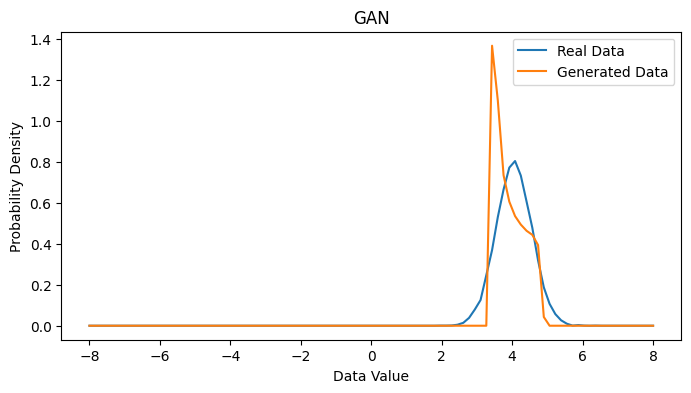

Step 4810: D Loss - 1.3786578178405762 G Loss - 0.8928102850914001
Step 4820: D Loss - 1.4220061302185059 G Loss - 0.8193538784980774
Step 4830: D Loss - 1.327386498451233 G Loss - 0.7027649879455566
Step 4840: D Loss - 1.3216010332107544 G Loss - 0.7405994534492493
Step 4850: D Loss - 1.3325450420379639 G Loss - 0.6756084561347961
Step 4860: D Loss - 1.3480288982391357 G Loss - 0.7392959594726562
Step 4870: D Loss - 1.304850459098816 G Loss - 0.7165756225585938
Step 4880: D Loss - 1.3859796524047852 G Loss - 0.7363142967224121
Step 4890: D Loss - 1.3714699745178223 G Loss - 0.5826197266578674
Step 4900: D Loss - 1.3185667991638184 G Loss - 0.7696430683135986


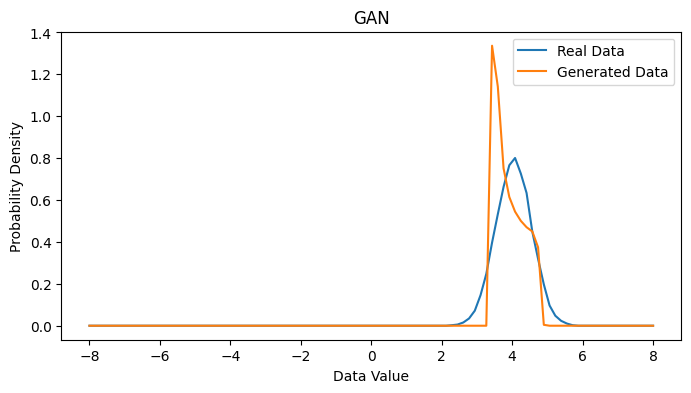

Step 4910: D Loss - 1.3453810214996338 G Loss - 0.7491735816001892
Step 4920: D Loss - 1.2789994478225708 G Loss - 0.8451483845710754
Step 4930: D Loss - 1.2916295528411865 G Loss - 0.8144693374633789
Step 4940: D Loss - 1.4239861965179443 G Loss - 0.8574659824371338
Step 4950: D Loss - 1.325019359588623 G Loss - 0.790574848651886
Step 4960: D Loss - 1.3392773866653442 G Loss - 0.744174063205719
Step 4970: D Loss - 1.304680585861206 G Loss - 0.7467508912086487
Step 4980: D Loss - 1.3849942684173584 G Loss - 0.9155295491218567
Step 4990: D Loss - 1.3364253044128418 G Loss - 0.8760430216789246
Step 5000: D Loss - 1.3870313167572021 G Loss - 0.8617048263549805


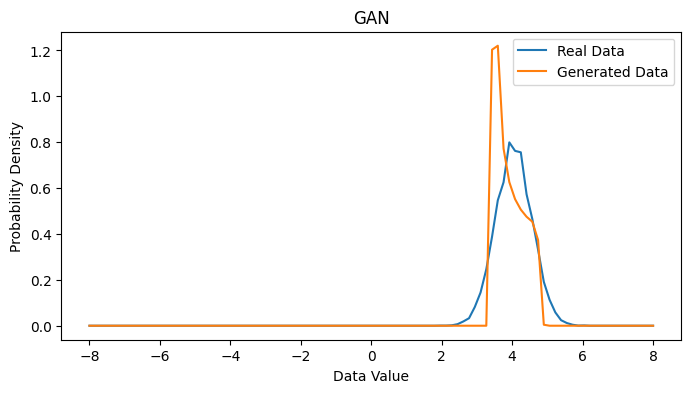

Step 5010: D Loss - 1.3166149854660034 G Loss - 0.6893575191497803
Step 5020: D Loss - 1.3919215202331543 G Loss - 0.556003749370575
Step 5030: D Loss - 1.3267093896865845 G Loss - 0.6366882920265198
Step 5040: D Loss - 1.2643647193908691 G Loss - 0.7975992560386658
Step 5050: D Loss - 1.377614140510559 G Loss - 0.7759482264518738
Step 5060: D Loss - 1.340529203414917 G Loss - 0.739626944065094
Step 5070: D Loss - 1.3528592586517334 G Loss - 0.9113507866859436
Step 5080: D Loss - 1.2807040214538574 G Loss - 0.8199794888496399
Step 5090: D Loss - 1.3449208736419678 G Loss - 0.6939941048622131
Step 5100: D Loss - 1.342960000038147 G Loss - 0.8066902756690979


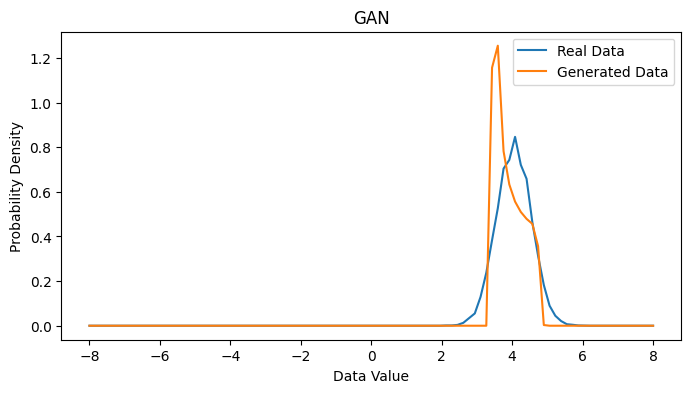

Step 5110: D Loss - 1.4599692821502686 G Loss - 0.8206102252006531
Step 5120: D Loss - 1.3721041679382324 G Loss - 0.77911776304245
Step 5130: D Loss - 1.297147512435913 G Loss - 0.7677027583122253
Step 5140: D Loss - 1.396154522895813 G Loss - 0.6862609386444092
Step 5150: D Loss - 1.4149593114852905 G Loss - 0.7590120434761047
Step 5160: D Loss - 1.3872120380401611 G Loss - 0.7978925704956055
Step 5170: D Loss - 1.287566900253296 G Loss - 0.9379029870033264
Step 5180: D Loss - 1.4539744853973389 G Loss - 0.7568582892417908
Step 5190: D Loss - 1.2634303569793701 G Loss - 0.7721863389015198
Step 5200: D Loss - 1.3955416679382324 G Loss - 0.7703399658203125


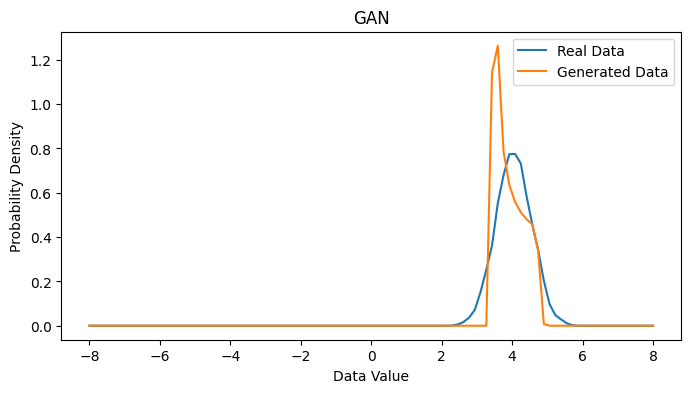

Step 5210: D Loss - 1.3880572319030762 G Loss - 0.8006219267845154
Step 5220: D Loss - 1.3486347198486328 G Loss - 0.7189962863922119
Step 5230: D Loss - 1.3149185180664062 G Loss - 0.7653217911720276
Step 5240: D Loss - 1.2908596992492676 G Loss - 0.8508623242378235
Step 5250: D Loss - 1.3308395147323608 G Loss - 0.7958396077156067
Step 5260: D Loss - 1.3216588497161865 G Loss - 0.7338618636131287
Step 5270: D Loss - 1.2947354316711426 G Loss - 0.8514310717582703
Step 5280: D Loss - 1.3117519617080688 G Loss - 0.8835305571556091
Step 5290: D Loss - 1.3230277299880981 G Loss - 0.8021556735038757
Step 5300: D Loss - 1.3614686727523804 G Loss - 0.6359309554100037


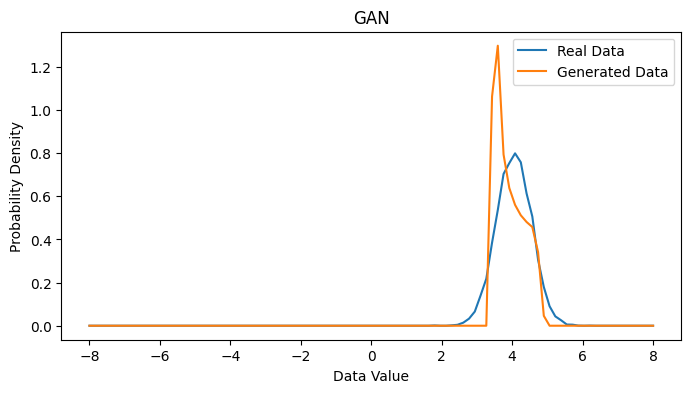

Step 5310: D Loss - 1.313842535018921 G Loss - 0.7586025595664978
Step 5320: D Loss - 1.3303810358047485 G Loss - 0.7352291941642761
Step 5330: D Loss - 1.4535226821899414 G Loss - 0.7935670018196106
Step 5340: D Loss - 1.3763786554336548 G Loss - 0.7120618224143982
Step 5350: D Loss - 1.2812843322753906 G Loss - 0.8256893157958984
Step 5360: D Loss - 1.334136724472046 G Loss - 0.6180831789970398
Step 5370: D Loss - 1.3132938146591187 G Loss - 0.7652838230133057
Step 5380: D Loss - 1.2562108039855957 G Loss - 0.8475492000579834
Step 5390: D Loss - 1.2192797660827637 G Loss - 0.8783618807792664
Step 5400: D Loss - 1.3148117065429688 G Loss - 0.8533339500427246


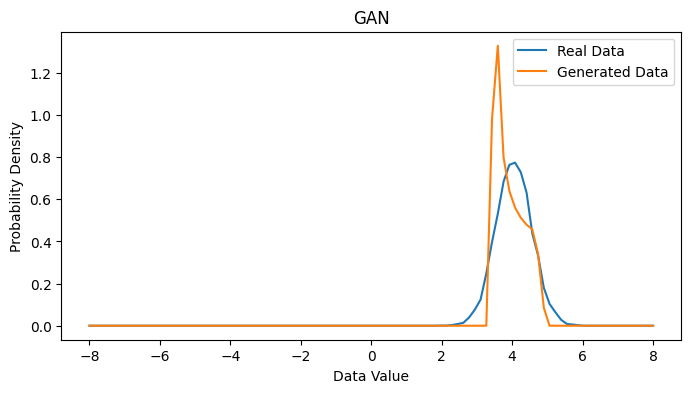

Step 5410: D Loss - 1.3126732110977173 G Loss - 0.8612843155860901
Step 5420: D Loss - 1.274951696395874 G Loss - 0.7789459824562073
Step 5430: D Loss - 1.3188378810882568 G Loss - 0.7207297682762146
Step 5440: D Loss - 1.2563859224319458 G Loss - 0.9812325835227966
Step 5450: D Loss - 1.3889392614364624 G Loss - 0.5969728827476501
Step 5460: D Loss - 1.3339731693267822 G Loss - 0.782268226146698
Step 5470: D Loss - 1.3971443176269531 G Loss - 0.7177262902259827
Step 5480: D Loss - 1.3199831247329712 G Loss - 0.7815548777580261
Step 5490: D Loss - 1.327629804611206 G Loss - 0.6963415145874023
Step 5500: D Loss - 1.3176312446594238 G Loss - 0.8258726000785828


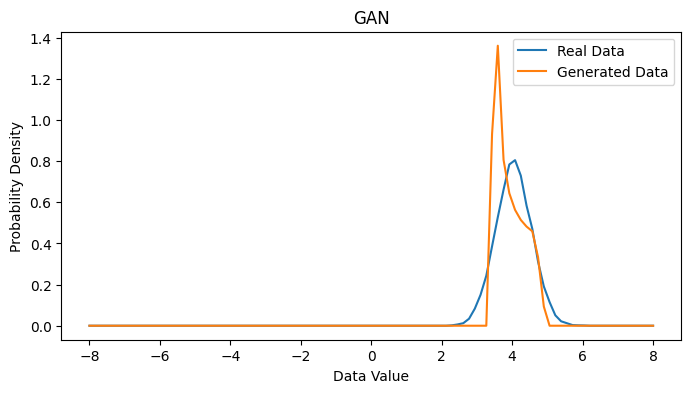

Step 5510: D Loss - 1.2856138944625854 G Loss - 0.8390719890594482
Step 5520: D Loss - 1.357846736907959 G Loss - 0.7552025318145752
Step 5530: D Loss - 1.3378162384033203 G Loss - 0.7178800106048584
Step 5540: D Loss - 1.3506484031677246 G Loss - 0.6761159896850586
Step 5550: D Loss - 1.319803237915039 G Loss - 0.729030191898346
Step 5560: D Loss - 1.2164735794067383 G Loss - 0.841099739074707
Step 5570: D Loss - 1.3422503471374512 G Loss - 0.8752339482307434
Step 5580: D Loss - 1.264099359512329 G Loss - 0.7899482846260071
Step 5590: D Loss - 1.3258452415466309 G Loss - 0.7241137623786926
Step 5600: D Loss - 1.286505103111267 G Loss - 0.8089368939399719


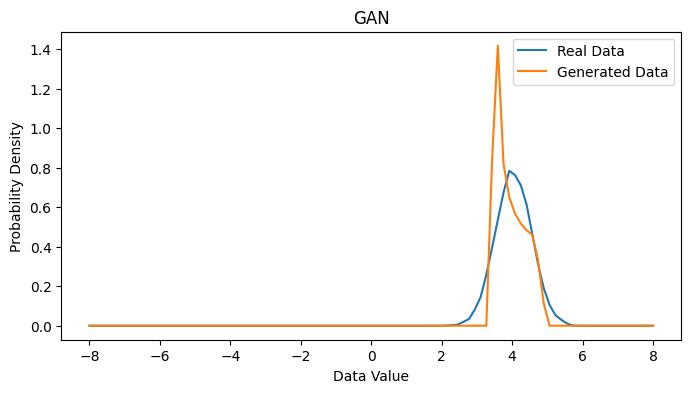

Step 5610: D Loss - 1.3197059631347656 G Loss - 0.7624221444129944
Step 5620: D Loss - 1.319028615951538 G Loss - 0.7708678841590881
Step 5630: D Loss - 1.4289753437042236 G Loss - 0.5933154225349426
Step 5640: D Loss - 1.3140196800231934 G Loss - 0.7228238582611084
Step 5650: D Loss - 1.330864429473877 G Loss - 0.7939309477806091
Step 5660: D Loss - 1.3451545238494873 G Loss - 0.8641237616539001
Step 5670: D Loss - 1.296396017074585 G Loss - 0.7696383595466614
Step 5680: D Loss - 1.3373879194259644 G Loss - 0.7897772789001465
Step 5690: D Loss - 1.248476505279541 G Loss - 0.8370018005371094
Step 5700: D Loss - 1.2845655679702759 G Loss - 0.7712876200675964


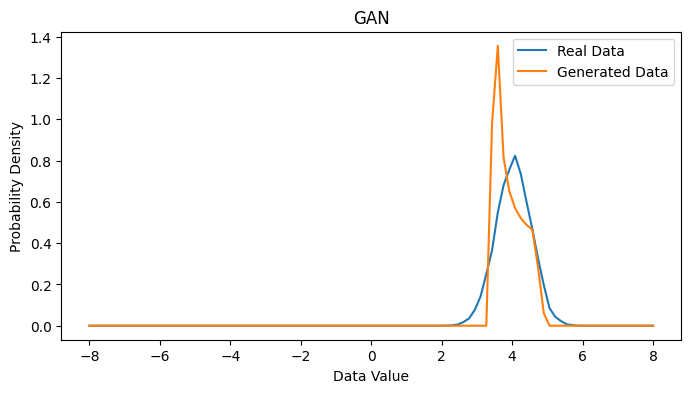

Step 5710: D Loss - 1.3518874645233154 G Loss - 0.6951069831848145
Step 5720: D Loss - 1.2823312282562256 G Loss - 0.7098056674003601
Step 5730: D Loss - 1.3703246116638184 G Loss - 0.7170383930206299
Step 5740: D Loss - 1.350917100906372 G Loss - 0.6645463109016418
Step 5750: D Loss - 1.2657839059829712 G Loss - 0.9073026776313782
Step 5760: D Loss - 1.2235183715820312 G Loss - 0.8576005101203918
Step 5770: D Loss - 1.2993052005767822 G Loss - 0.8467225432395935
Step 5780: D Loss - 1.3171453475952148 G Loss - 0.7522282004356384
Step 5790: D Loss - 1.2980108261108398 G Loss - 0.6573006510734558
Step 5800: D Loss - 1.3487763404846191 G Loss - 0.8366487622261047


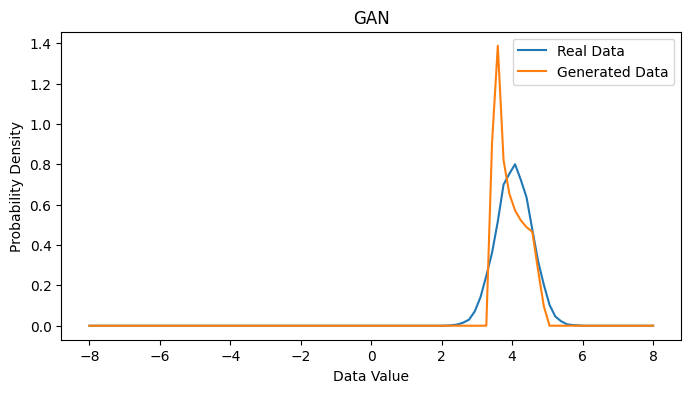

Step 5810: D Loss - 1.2396752834320068 G Loss - 0.905580997467041
Step 5820: D Loss - 1.3801708221435547 G Loss - 0.6369096636772156
Step 5830: D Loss - 1.3392319679260254 G Loss - 0.7736627459526062
Step 5840: D Loss - 1.2203247547149658 G Loss - 0.9251741766929626
Step 5850: D Loss - 1.338700532913208 G Loss - 0.902264416217804
Step 5860: D Loss - 1.3696247339248657 G Loss - 0.7526538372039795
Step 5870: D Loss - 1.2324755191802979 G Loss - 0.9104035496711731
Step 5880: D Loss - 1.3441400527954102 G Loss - 0.6659371256828308
Step 5890: D Loss - 1.308374285697937 G Loss - 0.8546192646026611
Step 5900: D Loss - 1.317608118057251 G Loss - 0.6559380888938904


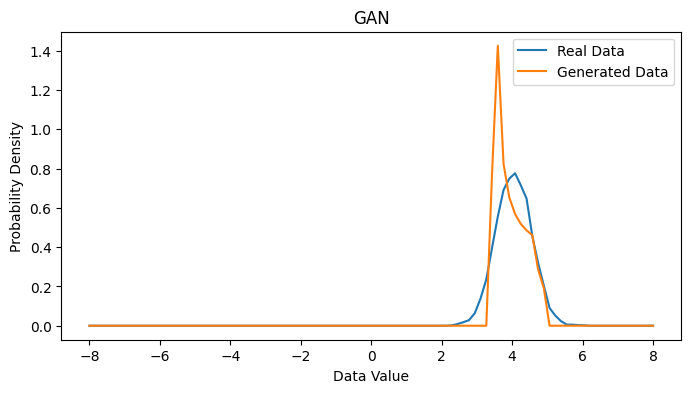

Step 5910: D Loss - 1.339937686920166 G Loss - 0.7692096829414368
Step 5920: D Loss - 1.3584671020507812 G Loss - 0.6417979598045349
Step 5930: D Loss - 1.3426451683044434 G Loss - 0.7816211581230164
Step 5940: D Loss - 1.188755750656128 G Loss - 0.8960835337638855
Step 5950: D Loss - 1.2849528789520264 G Loss - 0.7854869961738586
Step 5960: D Loss - 1.2647448778152466 G Loss - 0.8814458847045898
Step 5970: D Loss - 1.3276069164276123 G Loss - 0.9004976153373718
Step 5980: D Loss - 1.3614660501480103 G Loss - 0.7117026448249817
Step 5990: D Loss - 1.280038833618164 G Loss - 0.8894870281219482
Step 6000: D Loss - 1.3232033252716064 G Loss - 0.8201332688331604


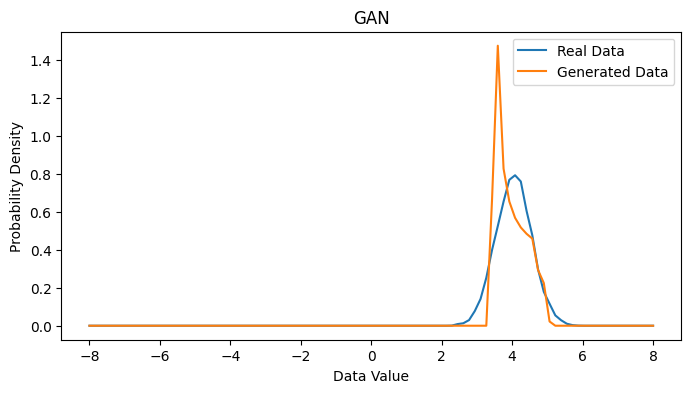

Step 6010: D Loss - 1.3352762460708618 G Loss - 0.6994707584381104
Step 6020: D Loss - 1.242132544517517 G Loss - 0.8463461995124817
Step 6030: D Loss - 1.3614883422851562 G Loss - 0.8815073370933533
Step 6040: D Loss - 1.351452350616455 G Loss - 0.6917359828948975
Step 6050: D Loss - 1.3995954990386963 G Loss - 0.7566642165184021
Step 6060: D Loss - 1.3634998798370361 G Loss - 0.757781982421875
Step 6070: D Loss - 1.3464651107788086 G Loss - 0.7027977108955383
Step 6080: D Loss - 1.2858741283416748 G Loss - 0.7987273335456848
Step 6090: D Loss - 1.3434792757034302 G Loss - 0.7418167591094971
Step 6100: D Loss - 1.3020586967468262 G Loss - 0.753250777721405


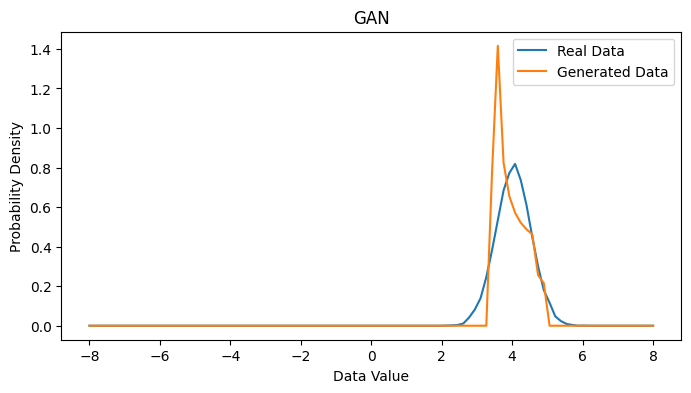

Step 6110: D Loss - 1.1629996299743652 G Loss - 0.8978168368339539
Step 6120: D Loss - 1.3038743734359741 G Loss - 0.7392580509185791
Step 6130: D Loss - 1.2992277145385742 G Loss - 0.6252530217170715
Step 6140: D Loss - 1.3458318710327148 G Loss - 0.7124105095863342
Step 6150: D Loss - 1.4649360179901123 G Loss - 0.8128910064697266
Step 6160: D Loss - 1.3466637134552002 G Loss - 0.7977927327156067
Step 6170: D Loss - 1.4577674865722656 G Loss - 0.7436835765838623
Step 6180: D Loss - 1.3436411619186401 G Loss - 0.7514575123786926
Step 6190: D Loss - 1.2004413604736328 G Loss - 0.8692095279693604
Step 6200: D Loss - 1.3819621801376343 G Loss - 0.6205087304115295


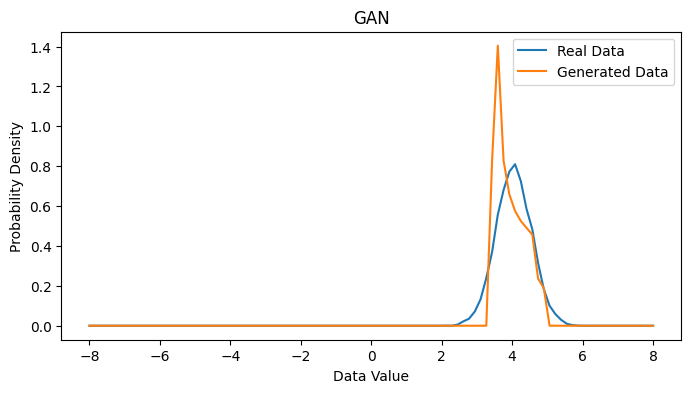

Step 6210: D Loss - 1.3175702095031738 G Loss - 0.765082061290741
Step 6220: D Loss - 1.2288014888763428 G Loss - 0.8494152426719666
Step 6230: D Loss - 1.2620751857757568 G Loss - 0.8690091967582703
Step 6240: D Loss - 1.2709105014801025 G Loss - 0.938732922077179
Step 6250: D Loss - 1.358346939086914 G Loss - 0.767993688583374
Step 6260: D Loss - 1.3171734809875488 G Loss - 0.728290319442749
Step 6270: D Loss - 1.30135178565979 G Loss - 0.7722713351249695
Step 6280: D Loss - 1.2392635345458984 G Loss - 0.7953413128852844
Step 6290: D Loss - 1.3402189016342163 G Loss - 0.7395344376564026
Step 6300: D Loss - 1.271072268486023 G Loss - 0.7651336789131165


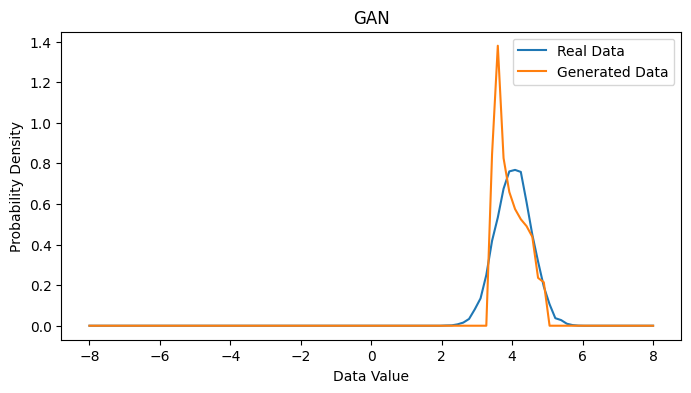

Step 6310: D Loss - 1.1728242635726929 G Loss - 0.8690517544746399
Step 6320: D Loss - 1.3731874227523804 G Loss - 0.6979832649230957
Step 6330: D Loss - 1.2707147598266602 G Loss - 0.897087574005127
Step 6340: D Loss - 1.3439093828201294 G Loss - 0.705085277557373
Step 6350: D Loss - 1.2240386009216309 G Loss - 0.866085946559906
Step 6360: D Loss - 1.2308495044708252 G Loss - 0.9188321232795715
Step 6370: D Loss - 1.2720940113067627 G Loss - 0.8619065284729004
Step 6380: D Loss - 1.3017688989639282 G Loss - 0.8596203923225403
Step 6390: D Loss - 1.3354229927062988 G Loss - 0.8267204165458679
Step 6400: D Loss - 1.1842784881591797 G Loss - 0.9567081928253174


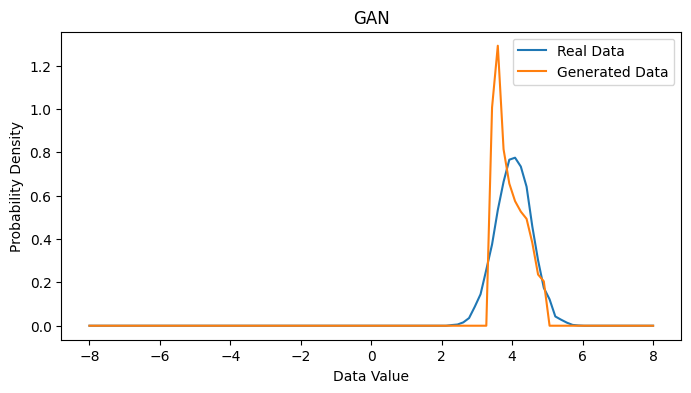

Step 6410: D Loss - 1.2042467594146729 G Loss - 0.9735355973243713
Step 6420: D Loss - 1.3550126552581787 G Loss - 0.7163627743721008
Step 6430: D Loss - 1.2771021127700806 G Loss - 0.9228382110595703
Step 6440: D Loss - 1.2398386001586914 G Loss - 0.8690452575683594
Step 6450: D Loss - 1.3247544765472412 G Loss - 0.7855531573295593
Step 6460: D Loss - 1.3245911598205566 G Loss - 0.848966658115387
Step 6470: D Loss - 1.217947244644165 G Loss - 0.8450430035591125
Step 6480: D Loss - 1.3117425441741943 G Loss - 0.8024852871894836
Step 6490: D Loss - 1.3741557598114014 G Loss - 0.7765874862670898
Step 6500: D Loss - 1.2842295169830322 G Loss - 0.8771929144859314


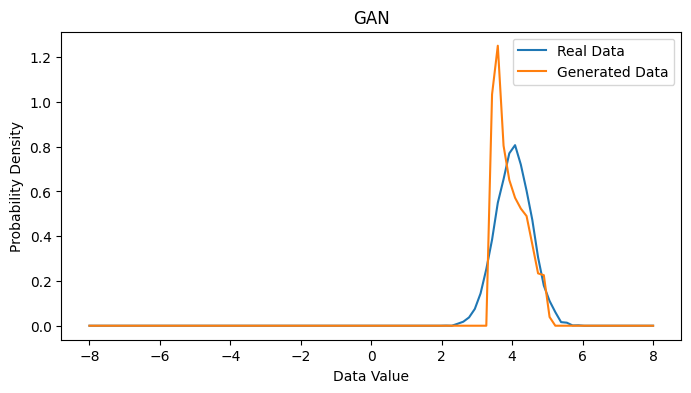

Step 6510: D Loss - 1.2711498737335205 G Loss - 0.7258060574531555
Step 6520: D Loss - 1.2779955863952637 G Loss - 0.8910849094390869
Step 6530: D Loss - 1.2684657573699951 G Loss - 0.8487880825996399
Step 6540: D Loss - 1.3968662023544312 G Loss - 0.6850903034210205
Step 6550: D Loss - 1.3547965288162231 G Loss - 0.7643070220947266
Step 6560: D Loss - 1.270371437072754 G Loss - 0.7709474563598633
Step 6570: D Loss - 1.3015681505203247 G Loss - 0.7954719662666321
Step 6580: D Loss - 1.1227566003799438 G Loss - 0.9698502421379089
Step 6590: D Loss - 1.1754686832427979 G Loss - 0.9373709559440613
Step 6600: D Loss - 1.3652751445770264 G Loss - 0.7501972317695618


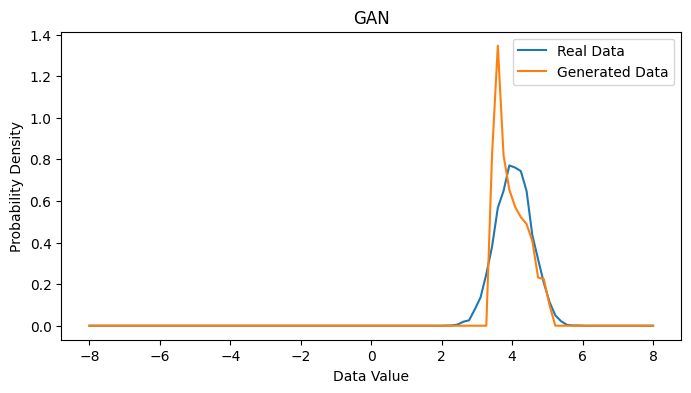

Step 6610: D Loss - 1.266980767250061 G Loss - 0.8395022749900818
Step 6620: D Loss - 1.315970540046692 G Loss - 0.8398543000221252
Step 6630: D Loss - 1.286750078201294 G Loss - 0.8890298008918762
Step 6640: D Loss - 1.3636705875396729 G Loss - 0.7419772744178772
Step 6650: D Loss - 1.3530464172363281 G Loss - 0.752896785736084
Step 6660: D Loss - 1.2765141725540161 G Loss - 0.8106644749641418
Step 6670: D Loss - 1.3307753801345825 G Loss - 0.7509075999259949
Step 6680: D Loss - 1.3216328620910645 G Loss - 0.7929999232292175
Step 6690: D Loss - 1.3346712589263916 G Loss - 0.7681338787078857
Step 6700: D Loss - 1.3682315349578857 G Loss - 0.7334851622581482


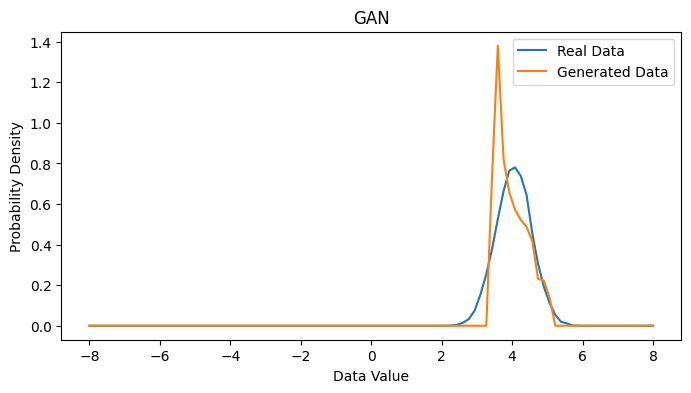

Step 6710: D Loss - 1.2332977056503296 G Loss - 0.925361156463623
Step 6720: D Loss - 1.351977825164795 G Loss - 0.6395058035850525
Step 6730: D Loss - 1.359670639038086 G Loss - 0.7126893997192383
Step 6740: D Loss - 1.2926371097564697 G Loss - 0.834996223449707
Step 6750: D Loss - 1.3123881816864014 G Loss - 0.8077970147132874
Step 6760: D Loss - 1.3220930099487305 G Loss - 0.8820939064025879
Step 6770: D Loss - 1.4156510829925537 G Loss - 0.7239475846290588
Step 6780: D Loss - 1.3479294776916504 G Loss - 0.7584077715873718
Step 6790: D Loss - 1.197828769683838 G Loss - 0.8680712580680847
Step 6800: D Loss - 1.330944538116455 G Loss - 0.7508063316345215


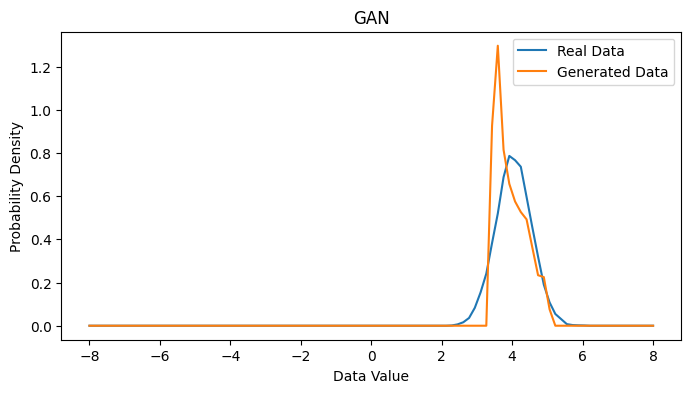

Step 6810: D Loss - 1.3223743438720703 G Loss - 0.879357635974884
Step 6820: D Loss - 1.239111065864563 G Loss - 0.910646378993988
Step 6830: D Loss - 1.3454475402832031 G Loss - 0.7441217303276062
Step 6840: D Loss - 1.3217077255249023 G Loss - 0.7444576621055603
Step 6850: D Loss - 1.2825233936309814 G Loss - 0.7630283236503601
Step 6860: D Loss - 1.372375249862671 G Loss - 0.7349240183830261
Step 6870: D Loss - 1.3591649532318115 G Loss - 0.7363450527191162
Step 6880: D Loss - 1.3385615348815918 G Loss - 0.6973549723625183
Step 6890: D Loss - 1.237018346786499 G Loss - 0.9618864059448242
Step 6900: D Loss - 1.183143138885498 G Loss - 0.7953615188598633


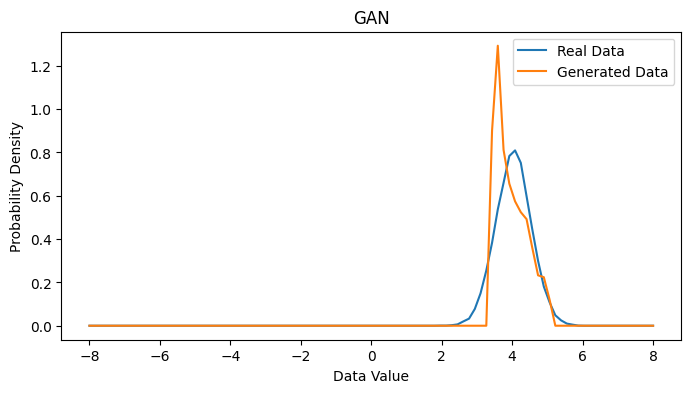

Step 6910: D Loss - 1.3024287223815918 G Loss - 0.7589148879051208
Step 6920: D Loss - 1.3444929122924805 G Loss - 0.7546188235282898
Step 6930: D Loss - 1.0644824504852295 G Loss - 1.0174399614334106
Step 6940: D Loss - 1.2345144748687744 G Loss - 0.8941801190376282
Step 6950: D Loss - 1.4134360551834106 G Loss - 0.6990513205528259
Step 6960: D Loss - 1.38377845287323 G Loss - 0.7269861698150635
Step 6970: D Loss - 1.3314220905303955 G Loss - 0.7420558929443359
Step 6980: D Loss - 1.426537036895752 G Loss - 0.6155769228935242
Step 6990: D Loss - 1.260589838027954 G Loss - 0.8494442105293274
Step 7000: D Loss - 1.2470155954360962 G Loss - 0.8916862607002258


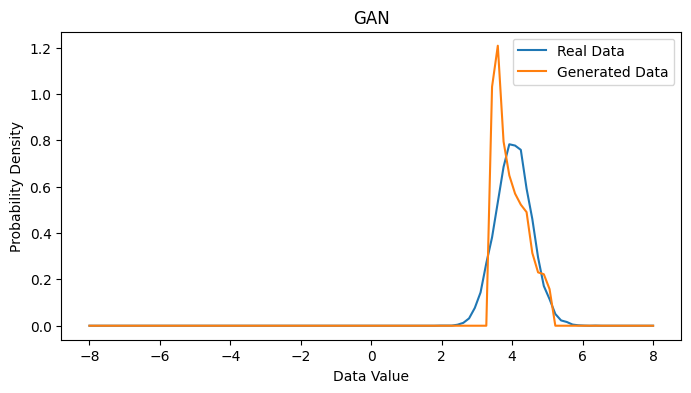

Step 7010: D Loss - 1.3000314235687256 G Loss - 0.862471878528595
Step 7020: D Loss - 1.4238642454147339 G Loss - 0.7232084274291992
Step 7030: D Loss - 1.2681318521499634 G Loss - 0.8400194644927979
Step 7040: D Loss - 1.3631500005722046 G Loss - 0.6851534843444824
Step 7050: D Loss - 1.2961606979370117 G Loss - 0.8016769289970398
Step 7060: D Loss - 1.2989742755889893 G Loss - 0.8421018123626709
Step 7070: D Loss - 1.3274192810058594 G Loss - 0.8474573493003845
Step 7080: D Loss - 1.3207981586456299 G Loss - 0.8509371280670166
Step 7090: D Loss - 1.2007935047149658 G Loss - 0.9261398315429688
Step 7100: D Loss - 1.1853835582733154 G Loss - 0.8128262162208557


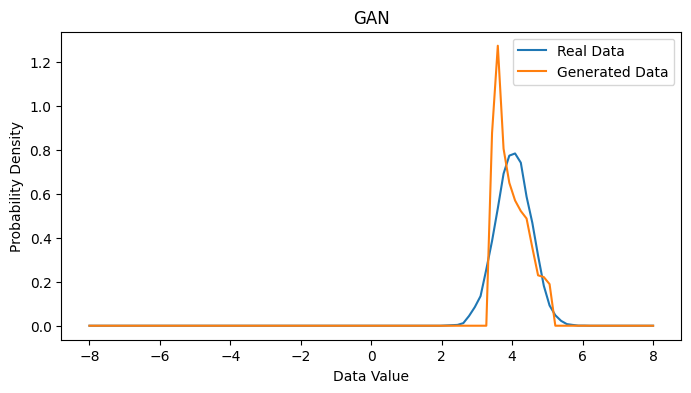

Step 7110: D Loss - 1.3893613815307617 G Loss - 0.6672348380088806
Step 7120: D Loss - 1.459349274635315 G Loss - 0.6793951988220215
Step 7130: D Loss - 1.2217351198196411 G Loss - 0.8261556625366211
Step 7140: D Loss - 1.311814308166504 G Loss - 0.8681146502494812
Step 7150: D Loss - 1.3019722700119019 G Loss - 0.811657726764679
Step 7160: D Loss - 1.3063044548034668 G Loss - 0.8419058322906494
Step 7170: D Loss - 1.2170912027359009 G Loss - 0.9375528693199158
Step 7180: D Loss - 1.2330822944641113 G Loss - 0.8793433308601379
Step 7190: D Loss - 1.3785918951034546 G Loss - 0.8305850028991699
Step 7200: D Loss - 1.338651418685913 G Loss - 0.8238067030906677


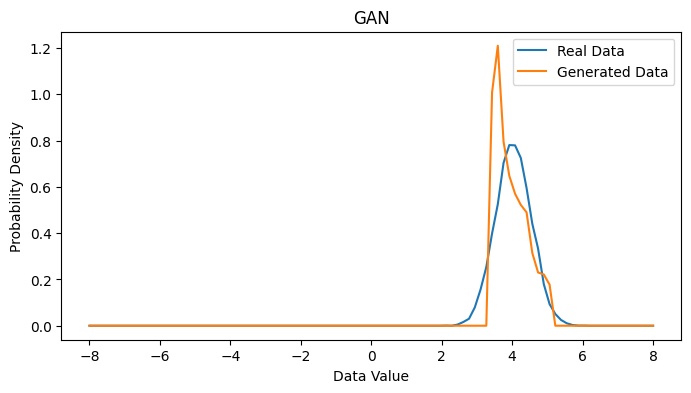

Step 7210: D Loss - 1.4252305030822754 G Loss - 0.7027626037597656
Step 7220: D Loss - 1.3211054801940918 G Loss - 0.7991890907287598
Step 7230: D Loss - 1.3969755172729492 G Loss - 0.8202342987060547
Step 7240: D Loss - 1.188697338104248 G Loss - 0.9520856738090515
Step 7250: D Loss - 1.3269751071929932 G Loss - 0.7743840217590332
Step 7260: D Loss - 1.2649693489074707 G Loss - 0.8577722907066345
Step 7270: D Loss - 1.1428306102752686 G Loss - 0.8899397253990173
Step 7280: D Loss - 1.2439875602722168 G Loss - 0.8506295084953308
Step 7290: D Loss - 1.3666447401046753 G Loss - 0.8786160945892334
Step 7300: D Loss - 1.3616540431976318 G Loss - 0.7260618805885315


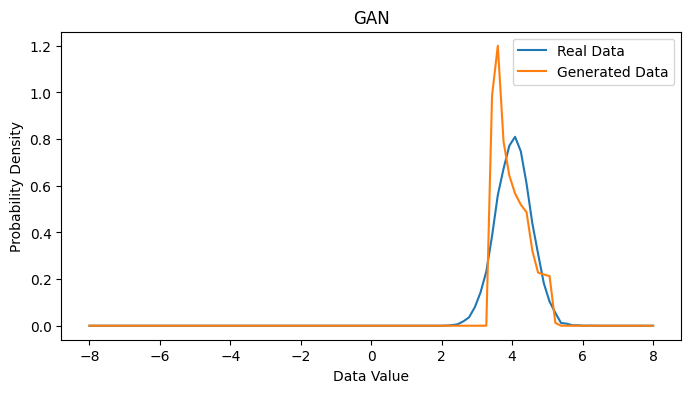

Step 7310: D Loss - 1.2477772235870361 G Loss - 0.8681765198707581
Step 7320: D Loss - 1.2833161354064941 G Loss - 0.8209441304206848
Step 7330: D Loss - 1.333824872970581 G Loss - 0.7943293452262878
Step 7340: D Loss - 1.313097357749939 G Loss - 0.7673032283782959
Step 7350: D Loss - 1.2165701389312744 G Loss - 0.8871271014213562
Step 7360: D Loss - 1.3251638412475586 G Loss - 0.7832896113395691
Step 7370: D Loss - 1.3713533878326416 G Loss - 0.7953208088874817
Step 7380: D Loss - 1.2567110061645508 G Loss - 0.8484401106834412
Step 7390: D Loss - 1.2817447185516357 G Loss - 0.8484165072441101
Step 7400: D Loss - 1.1455246210098267 G Loss - 0.945986807346344


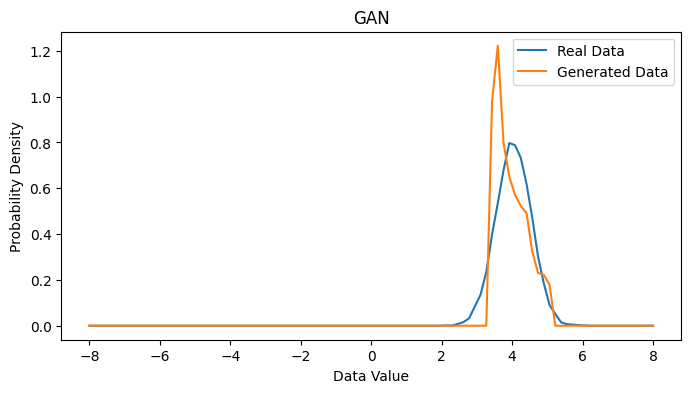

Step 7410: D Loss - 1.2912719249725342 G Loss - 0.846462070941925
Step 7420: D Loss - 1.495293378829956 G Loss - 0.6776350140571594
Step 7430: D Loss - 1.2068753242492676 G Loss - 0.8911494612693787
Step 7440: D Loss - 1.2098608016967773 G Loss - 0.8632392883300781
Step 7450: D Loss - 1.2356504201889038 G Loss - 0.8866820931434631
Step 7460: D Loss - 1.1860902309417725 G Loss - 0.8848697543144226
Step 7470: D Loss - 1.4545780420303345 G Loss - 0.7087743878364563
Step 7480: D Loss - 1.1131969690322876 G Loss - 0.8927204608917236
Step 7490: D Loss - 1.6147761344909668 G Loss - 1.0380600690841675
Step 7500: D Loss - 1.192762851715088 G Loss - 0.9013261198997498


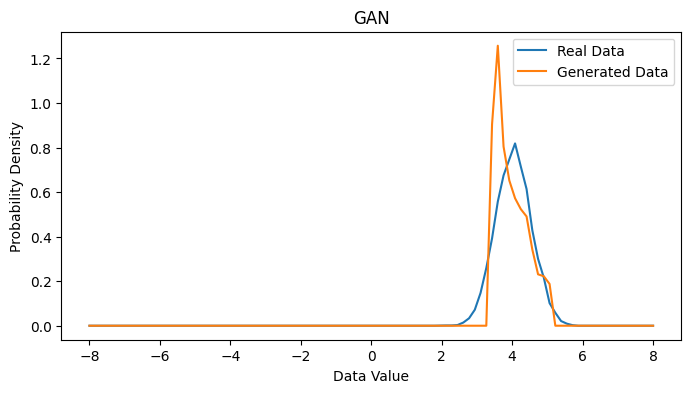

Step 7510: D Loss - 1.3472130298614502 G Loss - 0.8048387169837952
Step 7520: D Loss - 1.3548932075500488 G Loss - 0.7785313725471497
Step 7530: D Loss - 1.2930536270141602 G Loss - 0.7884423732757568
Step 7540: D Loss - 1.3715801239013672 G Loss - 0.7689545750617981
Step 7550: D Loss - 1.2179255485534668 G Loss - 0.7917712330818176
Step 7560: D Loss - 1.2087571620941162 G Loss - 0.8811638355255127
Step 7570: D Loss - 1.225121259689331 G Loss - 0.8073046207427979
Step 7580: D Loss - 1.2507539987564087 G Loss - 0.8785565495491028
Step 7590: D Loss - 1.3972821235656738 G Loss - 0.6751590371131897
Step 7600: D Loss - 1.2454779148101807 G Loss - 0.7684953808784485


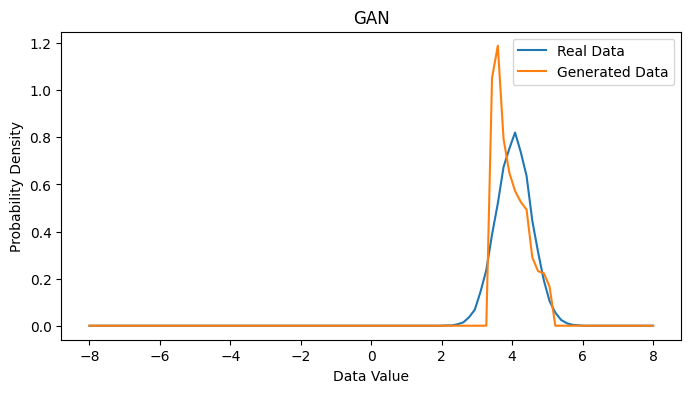

Step 7610: D Loss - 1.2486162185668945 G Loss - 1.0015310049057007
Step 7620: D Loss - 1.2764527797698975 G Loss - 0.8098857998847961
Step 7630: D Loss - 1.237511396408081 G Loss - 0.839421272277832
Step 7640: D Loss - 1.2983808517456055 G Loss - 0.8253791332244873
Step 7650: D Loss - 1.3152024745941162 G Loss - 0.8116345405578613
Step 7660: D Loss - 1.2584497928619385 G Loss - 0.8302733302116394
Step 7670: D Loss - 1.311075210571289 G Loss - 0.8333466053009033
Step 7680: D Loss - 1.316385269165039 G Loss - 0.7919806838035583
Step 7690: D Loss - 1.3292014598846436 G Loss - 0.7630729675292969
Step 7700: D Loss - 1.3283965587615967 G Loss - 0.7633559107780457


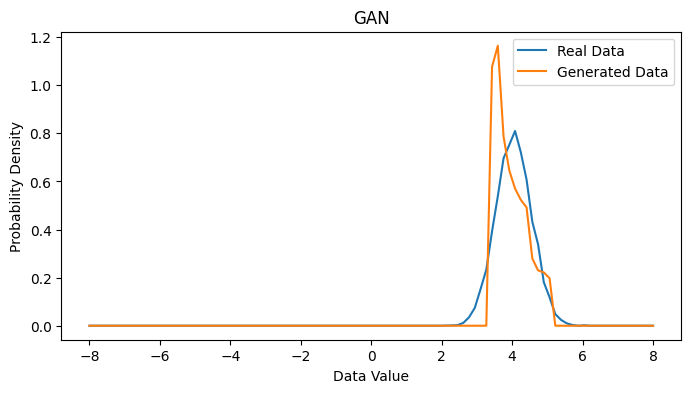

Step 7710: D Loss - 1.193119764328003 G Loss - 0.8852325081825256
Step 7720: D Loss - 1.3191485404968262 G Loss - 0.819422721862793
Step 7730: D Loss - 1.246325969696045 G Loss - 0.9281051158905029
Step 7740: D Loss - 1.2822777032852173 G Loss - 0.7948560118675232
Step 7750: D Loss - 1.449709415435791 G Loss - 0.7071390748023987
Step 7760: D Loss - 1.3444666862487793 G Loss - 0.7275063395500183
Step 7770: D Loss - 1.223541259765625 G Loss - 0.7937743067741394
Step 7780: D Loss - 1.2339117527008057 G Loss - 0.8776171803474426
Step 7790: D Loss - 1.1721785068511963 G Loss - 0.961254894733429
Step 7800: D Loss - 1.3154648542404175 G Loss - 0.7916030883789062


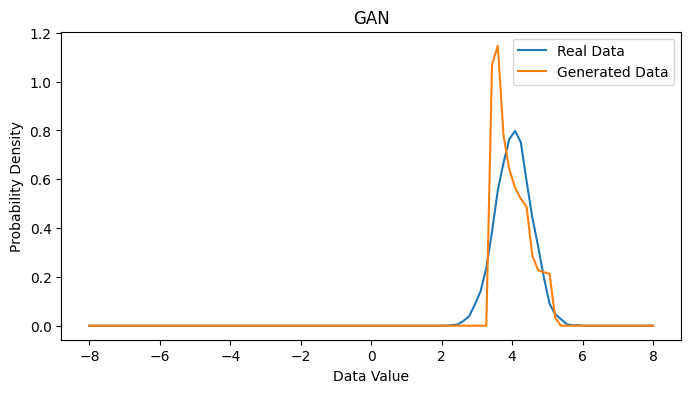

Step 7810: D Loss - 1.3118493556976318 G Loss - 0.7475137710571289
Step 7820: D Loss - 1.118242859840393 G Loss - 0.9710046648979187
Step 7830: D Loss - 1.3038158416748047 G Loss - 0.8035261034965515
Step 7840: D Loss - 1.2998805046081543 G Loss - 0.8673457503318787
Step 7850: D Loss - 1.3399577140808105 G Loss - 0.7642073631286621
Step 7860: D Loss - 1.370665431022644 G Loss - 0.7328819632530212
Step 7870: D Loss - 1.3853933811187744 G Loss - 0.6957270503044128
Step 7880: D Loss - 1.3245818614959717 G Loss - 0.8450808525085449
Step 7890: D Loss - 1.31828773021698 G Loss - 0.8057466149330139
Step 7900: D Loss - 1.3410381078720093 G Loss - 0.7152681350708008


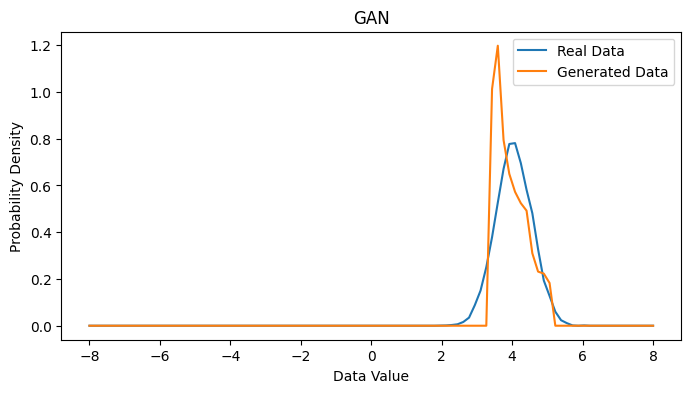

Step 7910: D Loss - 1.3067097663879395 G Loss - 0.8298673033714294
Step 7920: D Loss - 1.398982048034668 G Loss - 0.7467441558837891
Step 7930: D Loss - 1.5265874862670898 G Loss - 0.7025735378265381
Step 7940: D Loss - 1.4602177143096924 G Loss - 0.6780712604522705
Step 7950: D Loss - 1.1703698635101318 G Loss - 0.8948371410369873
Step 7960: D Loss - 1.157599925994873 G Loss - 0.9112265706062317
Step 7970: D Loss - 1.0893456935882568 G Loss - 0.9307649731636047
Step 7980: D Loss - 1.3627309799194336 G Loss - 0.815663754940033
Step 7990: D Loss - 1.3248484134674072 G Loss - 0.7335096001625061
Step 8000: D Loss - 1.282734990119934 G Loss - 0.8678727746009827


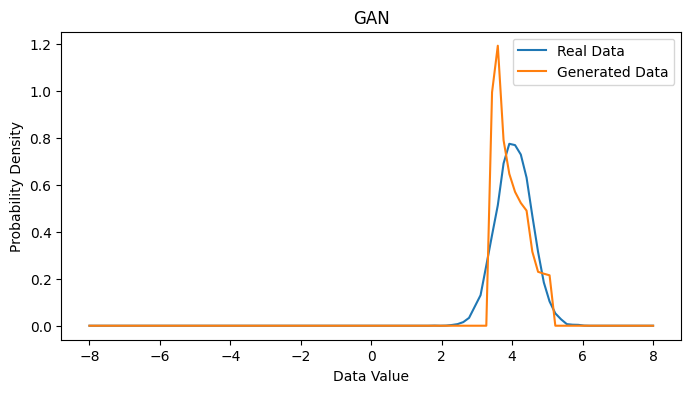

Step 8010: D Loss - 1.3539948463439941 G Loss - 0.7278535962104797
Step 8020: D Loss - 1.2303626537322998 G Loss - 0.8877341151237488
Step 8030: D Loss - 1.2293511629104614 G Loss - 0.8155460953712463
Step 8040: D Loss - 1.2223825454711914 G Loss - 0.8665801882743835
Step 8050: D Loss - 1.2119388580322266 G Loss - 0.8842483162879944
Step 8060: D Loss - 1.355540156364441 G Loss - 0.7498517036437988
Step 8070: D Loss - 1.2883543968200684 G Loss - 0.8270012736320496
Step 8080: D Loss - 1.225452184677124 G Loss - 0.8670898079872131
Step 8090: D Loss - 1.3399581909179688 G Loss - 0.742527186870575
Step 8100: D Loss - 1.2623507976531982 G Loss - 0.9450708031654358


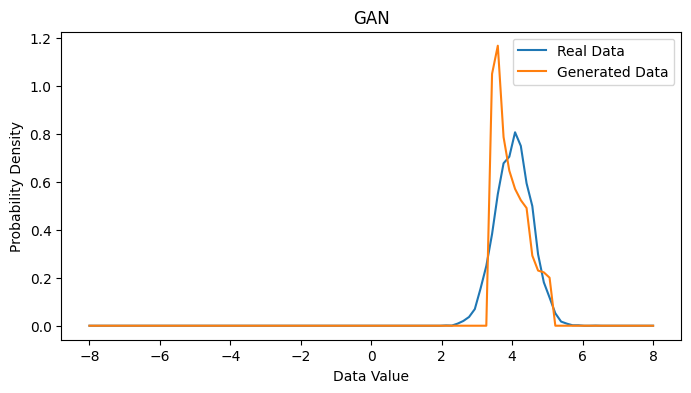

Step 8110: D Loss - 1.3598449230194092 G Loss - 0.7471823692321777
Step 8120: D Loss - 1.1946293115615845 G Loss - 0.8883697390556335
Step 8130: D Loss - 1.2765939235687256 G Loss - 0.8124964237213135
Step 8140: D Loss - 1.283489465713501 G Loss - 0.7831767201423645
Step 8150: D Loss - 1.3124483823776245 G Loss - 0.8496660590171814
Step 8160: D Loss - 1.4125193357467651 G Loss - 0.7195684909820557
Step 8170: D Loss - 1.3207268714904785 G Loss - 0.7755277752876282
Step 8180: D Loss - 1.2777680158615112 G Loss - 0.7116772532463074
Step 8190: D Loss - 1.329893708229065 G Loss - 0.8985376954078674
Step 8200: D Loss - 1.2762236595153809 G Loss - 0.8536994457244873


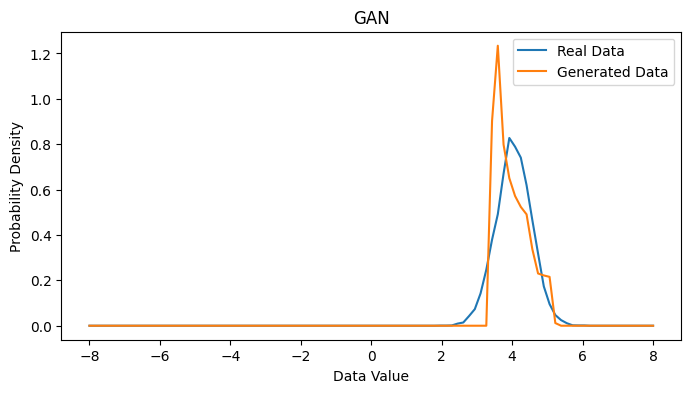

Step 8210: D Loss - 1.3213589191436768 G Loss - 0.7709732055664062
Step 8220: D Loss - 1.2945970296859741 G Loss - 0.8211777806282043
Step 8230: D Loss - 1.2372198104858398 G Loss - 0.8516759276390076
Step 8240: D Loss - 1.2647442817687988 G Loss - 0.820418655872345
Step 8250: D Loss - 1.2999972105026245 G Loss - 0.9010098576545715
Step 8260: D Loss - 1.231801152229309 G Loss - 0.8863827586174011
Step 8270: D Loss - 1.1253857612609863 G Loss - 0.9404501914978027
Step 8280: D Loss - 1.258963704109192 G Loss - 0.8462556004524231
Step 8290: D Loss - 1.275439977645874 G Loss - 0.7921974658966064
Step 8300: D Loss - 1.136420488357544 G Loss - 0.9683473706245422


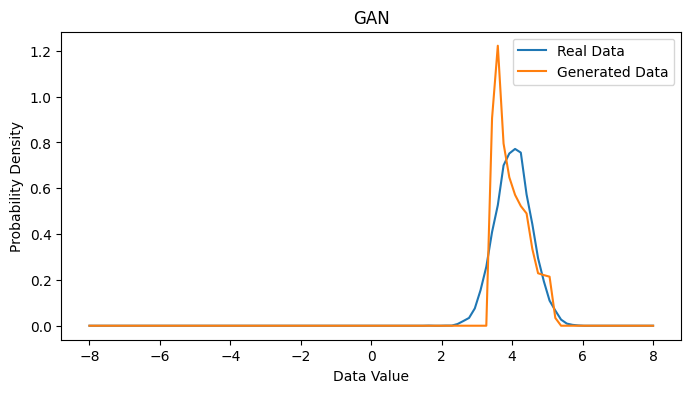

Step 8310: D Loss - 1.2582690715789795 G Loss - 0.8520557880401611
Step 8320: D Loss - 1.145653486251831 G Loss - 0.7995827198028564
Step 8330: D Loss - 1.2919431924819946 G Loss - 0.7797732353210449
Step 8340: D Loss - 1.2967534065246582 G Loss - 0.8201888203620911
Step 8350: D Loss - 1.3884831666946411 G Loss - 0.7756295800209045
Step 8360: D Loss - 1.4327229261398315 G Loss - 0.6786841750144958
Step 8370: D Loss - 1.2662217617034912 G Loss - 0.8221495151519775
Step 8380: D Loss - 1.3203349113464355 G Loss - 0.819983720779419
Step 8390: D Loss - 1.5685598850250244 G Loss - 0.7873842716217041
Step 8400: D Loss - 1.3248169422149658 G Loss - 0.8377513885498047


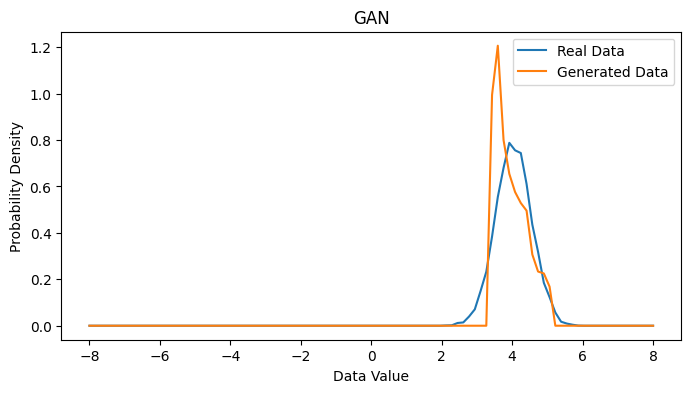

Step 8410: D Loss - 1.3453145027160645 G Loss - 0.7900641560554504
Step 8420: D Loss - 1.373333215713501 G Loss - 0.7761492729187012
Step 8430: D Loss - 1.4473904371261597 G Loss - 0.695491373538971
Step 8440: D Loss - 1.3296122550964355 G Loss - 0.770200252532959
Step 8450: D Loss - 1.1447197198867798 G Loss - 0.9261004328727722
Step 8460: D Loss - 1.5180132389068604 G Loss - 0.6922875046730042
Step 8470: D Loss - 1.379661202430725 G Loss - 0.7656026482582092
Step 8480: D Loss - 1.322243094444275 G Loss - 0.7944235801696777
Step 8490: D Loss - 1.212592363357544 G Loss - 0.8748741149902344
Step 8500: D Loss - 1.2244439125061035 G Loss - 0.7441446185112


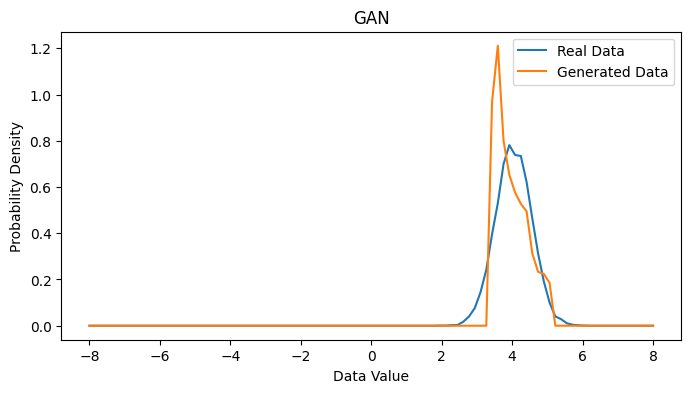

Step 8510: D Loss - 1.252441167831421 G Loss - 0.9001920223236084
Step 8520: D Loss - 1.0574629306793213 G Loss - 0.9139916300773621
Step 8530: D Loss - 1.1590654850006104 G Loss - 0.9137571454048157
Step 8540: D Loss - 1.2251110076904297 G Loss - 0.9428343772888184
Step 8550: D Loss - 1.2857859134674072 G Loss - 0.7841805815696716
Step 8560: D Loss - 1.3324875831604004 G Loss - 0.8877308368682861
Step 8570: D Loss - 1.3466938734054565 G Loss - 0.7564897537231445
Step 8580: D Loss - 1.2805793285369873 G Loss - 0.8009126782417297
Step 8590: D Loss - 1.3260395526885986 G Loss - 0.7232164740562439
Step 8600: D Loss - 1.1746906042099 G Loss - 0.8590738773345947


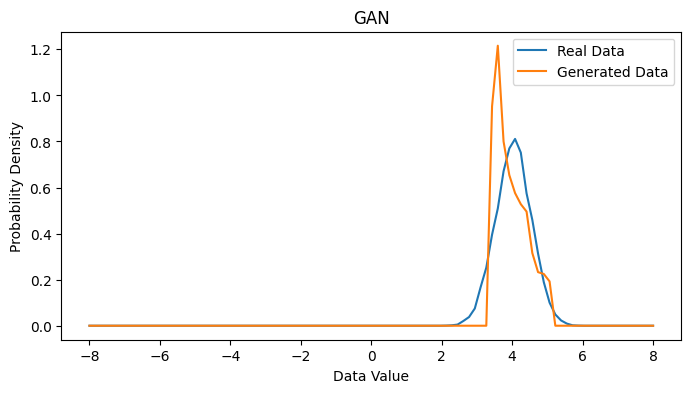

Step 8610: D Loss - 1.2722628116607666 G Loss - 0.8170247077941895
Step 8620: D Loss - 1.4056308269500732 G Loss - 0.826758861541748
Step 8630: D Loss - 1.4178993701934814 G Loss - 0.791903018951416
Step 8640: D Loss - 1.3560065031051636 G Loss - 0.7737939953804016
Step 8650: D Loss - 1.2211536169052124 G Loss - 0.8501285910606384
Step 8660: D Loss - 1.1975051164627075 G Loss - 0.8597803711891174
Step 8670: D Loss - 1.1947150230407715 G Loss - 0.8592635989189148
Step 8680: D Loss - 1.2053837776184082 G Loss - 0.8892948031425476
Step 8690: D Loss - 1.2468602657318115 G Loss - 0.8345211148262024
Step 8700: D Loss - 1.4687778949737549 G Loss - 0.796442985534668


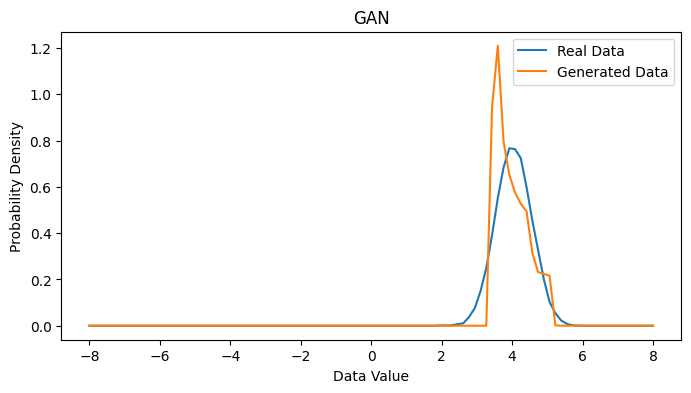

Step 8710: D Loss - 1.2267062664031982 G Loss - 0.8561069965362549
Step 8720: D Loss - 1.3653836250305176 G Loss - 0.8846858143806458
Step 8730: D Loss - 1.3647927045822144 G Loss - 0.7871556878089905
Step 8740: D Loss - 1.2811980247497559 G Loss - 0.8106110095977783
Step 8750: D Loss - 1.323617935180664 G Loss - 0.752001941204071
Step 8760: D Loss - 1.2944698333740234 G Loss - 0.8187568187713623
Step 8770: D Loss - 1.2187669277191162 G Loss - 0.8751754760742188
Step 8780: D Loss - 1.3011457920074463 G Loss - 0.7879988551139832
Step 8790: D Loss - 1.4203286170959473 G Loss - 0.8196954131126404
Step 8800: D Loss - 1.250286340713501 G Loss - 0.8407917618751526


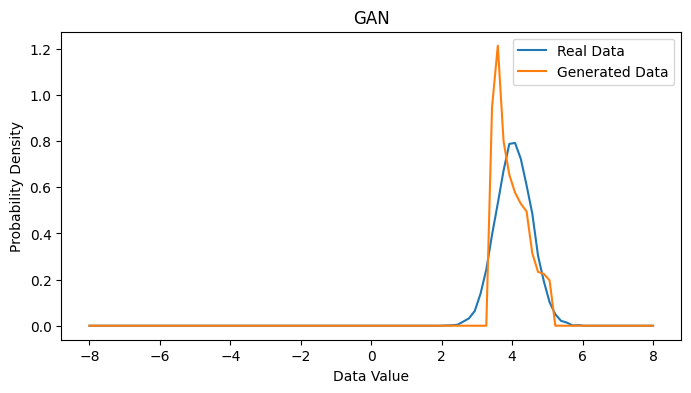

Step 8810: D Loss - 1.3418056964874268 G Loss - 0.7750368714332581
Step 8820: D Loss - 1.3376766443252563 G Loss - 0.8086037635803223
Step 8830: D Loss - 1.1413533687591553 G Loss - 0.7888866066932678
Step 8840: D Loss - 1.2386549711227417 G Loss - 0.8934367299079895
Step 8850: D Loss - 1.2663016319274902 G Loss - 0.7830232977867126
Step 8860: D Loss - 1.5081088542938232 G Loss - 0.6688017249107361
Step 8870: D Loss - 1.361350178718567 G Loss - 0.7247506976127625
Step 8880: D Loss - 1.351915717124939 G Loss - 0.7766653895378113
Step 8890: D Loss - 1.2728843688964844 G Loss - 0.8195852637290955
Step 8900: D Loss - 1.2800147533416748 G Loss - 0.7449497580528259


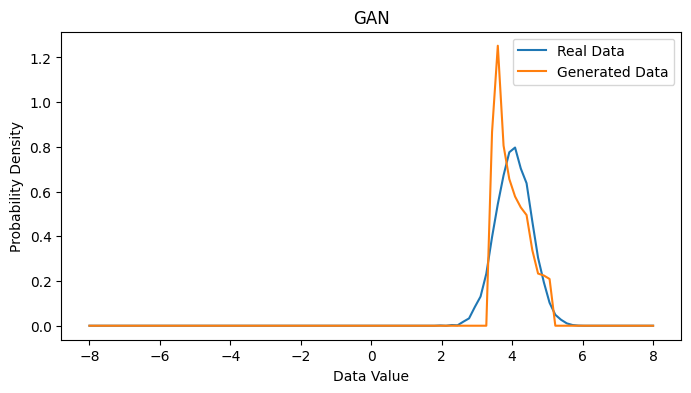

Step 8910: D Loss - 1.2594188451766968 G Loss - 0.8299844264984131
Step 8920: D Loss - 1.2970001697540283 G Loss - 0.8324493765830994
Step 8930: D Loss - 1.3432035446166992 G Loss - 0.7579197287559509
Step 8940: D Loss - 1.289628505706787 G Loss - 0.8155547976493835
Step 8950: D Loss - 1.2453433275222778 G Loss - 0.8343611359596252
Step 8960: D Loss - 1.1666332483291626 G Loss - 0.9172840714454651
Step 8970: D Loss - 1.150017499923706 G Loss - 0.8977383971214294
Step 8980: D Loss - 1.2672526836395264 G Loss - 0.8651670813560486
Step 8990: D Loss - 1.304579496383667 G Loss - 0.7475709319114685
Step 9000: D Loss - 1.301531195640564 G Loss - 0.8248597979545593


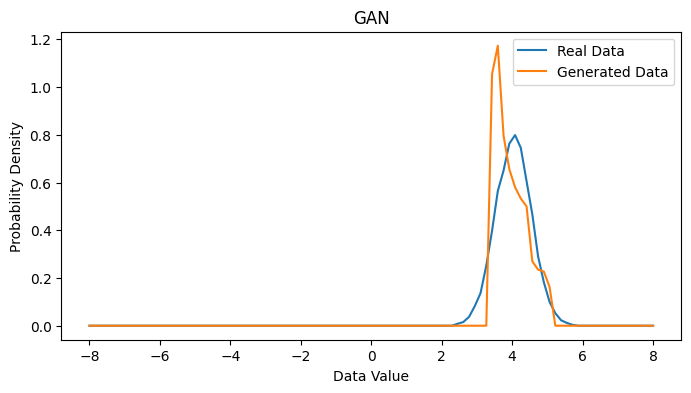

Step 9010: D Loss - 1.3387881517410278 G Loss - 0.7572593688964844
Step 9020: D Loss - 1.2916560173034668 G Loss - 0.8116841912269592
Step 9030: D Loss - 1.1985225677490234 G Loss - 0.8406144976615906
Step 9040: D Loss - 1.2299830913543701 G Loss - 0.7986431121826172
Step 9050: D Loss - 1.3679265975952148 G Loss - 0.7666799426078796
Step 9060: D Loss - 1.2523579597473145 G Loss - 0.8898313045501709
Step 9070: D Loss - 1.2539467811584473 G Loss - 0.873403012752533
Step 9080: D Loss - 1.3530263900756836 G Loss - 0.7490373253822327
Step 9090: D Loss - 1.405226707458496 G Loss - 0.754096508026123
Step 9100: D Loss - 1.3444032669067383 G Loss - 0.7749156355857849


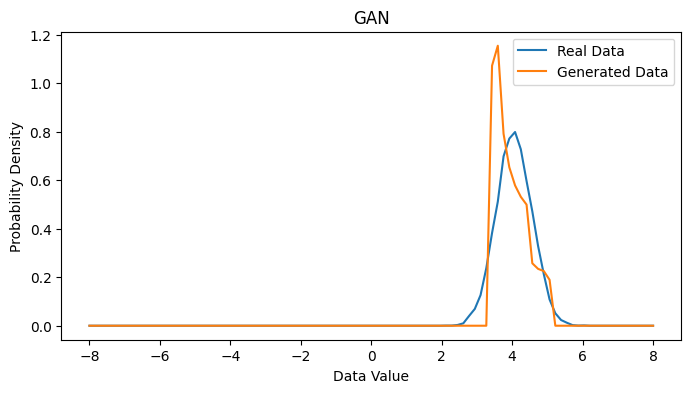

Step 9110: D Loss - 1.217203140258789 G Loss - 0.8864336609840393
Step 9120: D Loss - 1.3424266576766968 G Loss - 0.7405484318733215
Step 9130: D Loss - 1.1981313228607178 G Loss - 0.8081612586975098
Step 9140: D Loss - 1.3823808431625366 G Loss - 0.8048670291900635
Step 9150: D Loss - 1.2014825344085693 G Loss - 0.8951749801635742
Step 9160: D Loss - 1.331584095954895 G Loss - 0.7961752414703369
Step 9170: D Loss - 1.2780792713165283 G Loss - 0.794743537902832
Step 9180: D Loss - 1.3643462657928467 G Loss - 0.7573280930519104
Step 9190: D Loss - 1.2908408641815186 G Loss - 0.7400725483894348
Step 9200: D Loss - 1.3178184032440186 G Loss - 0.8091731071472168


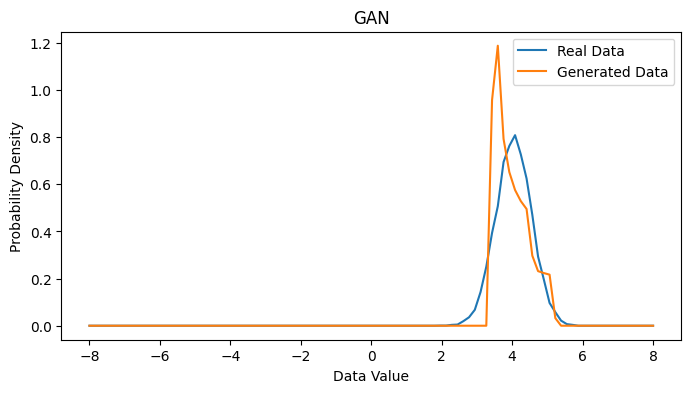

Step 9210: D Loss - 1.2074662446975708 G Loss - 0.9987004399299622
Step 9220: D Loss - 1.2852368354797363 G Loss - 0.7896669507026672
Step 9230: D Loss - 1.2505626678466797 G Loss - 0.8725917935371399
Step 9240: D Loss - 1.2028248310089111 G Loss - 0.8238091468811035
Step 9250: D Loss - 1.3531789779663086 G Loss - 0.7843480110168457
Step 9260: D Loss - 1.2722941637039185 G Loss - 0.8188934326171875
Step 9270: D Loss - 1.2971055507659912 G Loss - 0.8582152724266052
Step 9280: D Loss - 1.126358985900879 G Loss - 0.9814059138298035
Step 9290: D Loss - 1.4171557426452637 G Loss - 0.7836543917655945
Step 9300: D Loss - 1.2258774042129517 G Loss - 0.8298905491828918


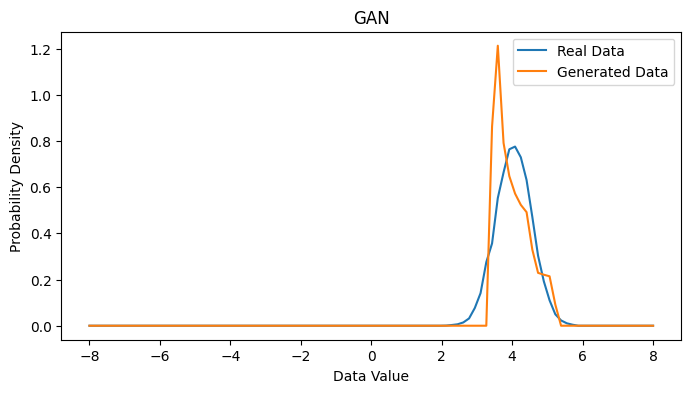

Step 9310: D Loss - 1.3596031665802002 G Loss - 0.8570132851600647
Step 9320: D Loss - 1.2034417390823364 G Loss - 0.882893979549408
Step 9330: D Loss - 1.1935784816741943 G Loss - 0.8402156829833984
Step 9340: D Loss - 1.3930920362472534 G Loss - 0.7192999720573425
Step 9350: D Loss - 1.3506853580474854 G Loss - 0.7633472084999084
Step 9360: D Loss - 1.235729694366455 G Loss - 0.82796710729599
Step 9370: D Loss - 1.265000343322754 G Loss - 0.8114597201347351
Step 9380: D Loss - 1.3294005393981934 G Loss - 0.7774770855903625
Step 9390: D Loss - 1.1989760398864746 G Loss - 0.8922006487846375
Step 9400: D Loss - 1.3854146003723145 G Loss - 0.7558233141899109


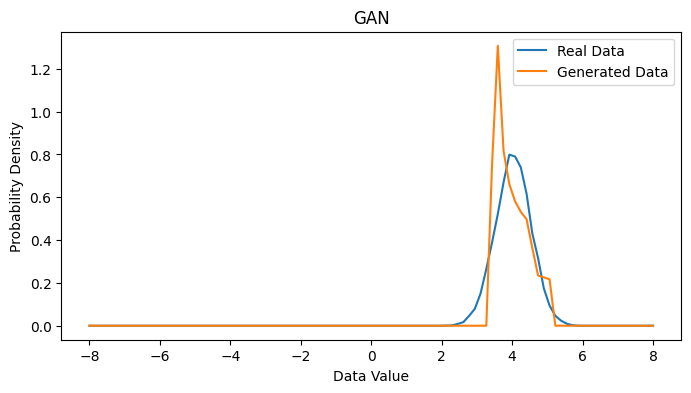

Step 9410: D Loss - 1.319629192352295 G Loss - 0.7977147102355957
Step 9420: D Loss - 1.1709671020507812 G Loss - 0.850214421749115
Step 9430: D Loss - 1.3169803619384766 G Loss - 0.8152236342430115
Step 9440: D Loss - 1.1955900192260742 G Loss - 0.8695284724235535
Step 9450: D Loss - 1.37198805809021 G Loss - 0.8137745261192322
Step 9460: D Loss - 1.5222575664520264 G Loss - 0.7685609459877014
Step 9470: D Loss - 1.4325721263885498 G Loss - 0.7581649422645569
Step 9480: D Loss - 1.4596266746520996 G Loss - 0.7240231037139893
Step 9490: D Loss - 1.2713794708251953 G Loss - 0.7738701701164246
Step 9500: D Loss - 1.1516079902648926 G Loss - 0.8878090381622314


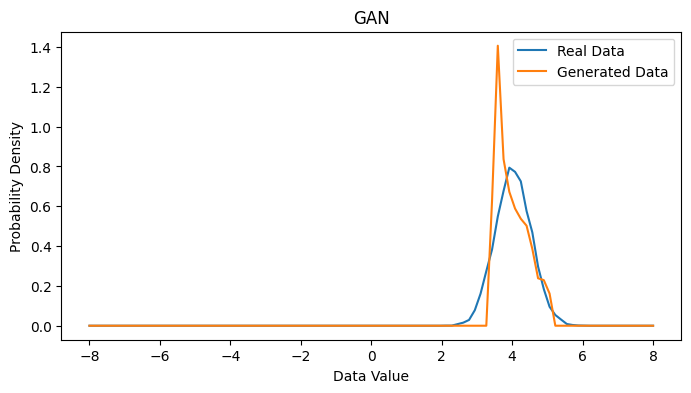

Step 9510: D Loss - 1.2718095779418945 G Loss - 0.9480934143066406
Step 9520: D Loss - 1.289236068725586 G Loss - 0.8209426403045654
Step 9530: D Loss - 1.2614548206329346 G Loss - 0.8170285820960999
Step 9540: D Loss - 1.369390606880188 G Loss - 0.770969808101654
Step 9550: D Loss - 1.2381421327590942 G Loss - 0.860921323299408
Step 9560: D Loss - 1.4345074892044067 G Loss - 0.7215454578399658
Step 9570: D Loss - 1.3604934215545654 G Loss - 0.7754784226417542
Step 9580: D Loss - 1.2721617221832275 G Loss - 0.832120954990387
Step 9590: D Loss - 1.2563226222991943 G Loss - 0.8455326557159424
Step 9600: D Loss - 1.094970941543579 G Loss - 0.9427000880241394


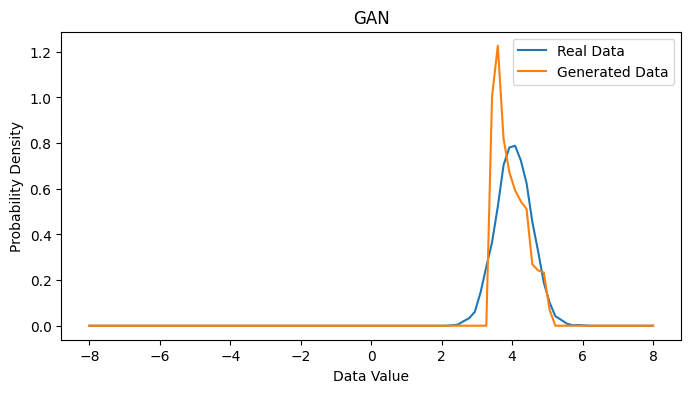

Step 9610: D Loss - 1.3133808374404907 G Loss - 0.8060182929039001
Step 9620: D Loss - 1.3787727355957031 G Loss - 0.7410607933998108
Step 9630: D Loss - 1.316408395767212 G Loss - 0.7632917761802673
Step 9640: D Loss - 1.4359219074249268 G Loss - 0.68117755651474
Step 9650: D Loss - 1.4869388341903687 G Loss - 0.7268336415290833
Step 9660: D Loss - 1.2457772493362427 G Loss - 0.8346517086029053
Step 9670: D Loss - 1.3376468420028687 G Loss - 0.7855023741722107
Step 9680: D Loss - 1.5034384727478027 G Loss - 0.7097232937812805
Step 9690: D Loss - 1.2581772804260254 G Loss - 0.840944766998291
Step 9700: D Loss - 1.3735957145690918 G Loss - 0.7588041424751282


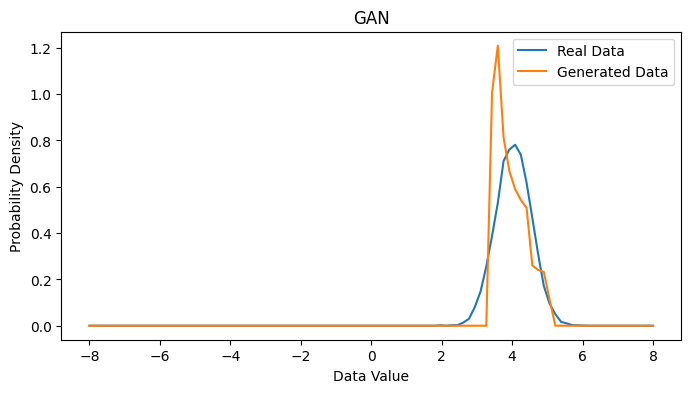

Step 9710: D Loss - 1.215945839881897 G Loss - 0.834812581539154
Step 9720: D Loss - 1.288341760635376 G Loss - 0.7702519297599792
Step 9730: D Loss - 1.292046308517456 G Loss - 0.8177877068519592
Step 9740: D Loss - 1.2441041469573975 G Loss - 0.8775832056999207
Step 9750: D Loss - 1.259063482284546 G Loss - 0.8779652714729309
Step 9760: D Loss - 1.3158466815948486 G Loss - 0.7822763919830322
Step 9770: D Loss - 1.4339007139205933 G Loss - 0.7608650326728821
Step 9780: D Loss - 1.232849359512329 G Loss - 0.8506900668144226
Step 9790: D Loss - 1.35946786403656 G Loss - 0.700839102268219
Step 9800: D Loss - 1.3070708513259888 G Loss - 0.8114164471626282


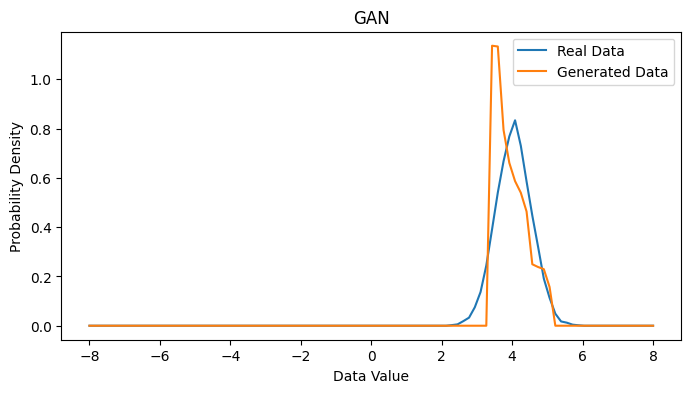

Step 9810: D Loss - 1.3641667366027832 G Loss - 0.7809212803840637
Step 9820: D Loss - 1.2320804595947266 G Loss - 0.793860912322998
Step 9830: D Loss - 1.2955422401428223 G Loss - 0.781285285949707
Step 9840: D Loss - 1.3078111410140991 G Loss - 0.7983503937721252
Step 9850: D Loss - 1.335282802581787 G Loss - 0.8039187788963318
Step 9860: D Loss - 1.3646774291992188 G Loss - 0.731234610080719
Step 9870: D Loss - 1.2534518241882324 G Loss - 0.8280226588249207
Step 9880: D Loss - 1.091539978981018 G Loss - 0.8851965069770813
Step 9890: D Loss - 1.314232349395752 G Loss - 0.7696380019187927
Step 9900: D Loss - 1.3420552015304565 G Loss - 0.8564813733100891


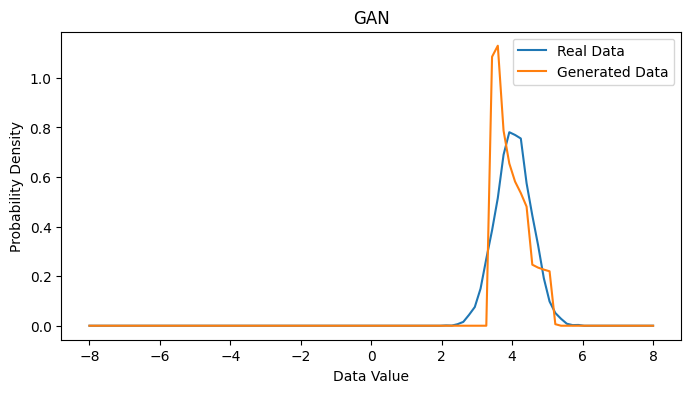

Step 9910: D Loss - 1.5098094940185547 G Loss - 0.6896163821220398
Step 9920: D Loss - 1.289259910583496 G Loss - 0.7344462275505066
Step 9930: D Loss - 1.2645853757858276 G Loss - 0.8009709715843201
Step 9940: D Loss - 1.242922067642212 G Loss - 0.7297771573066711
Step 9950: D Loss - 1.4269287586212158 G Loss - 0.7367802262306213
Step 9960: D Loss - 1.386888027191162 G Loss - 0.7193973064422607
Step 9970: D Loss - 1.294525146484375 G Loss - 0.7713139653205872
Step 9980: D Loss - 1.3108574151992798 G Loss - 0.8005406260490417
Step 9990: D Loss - 1.40886652469635 G Loss - 0.7858365178108215


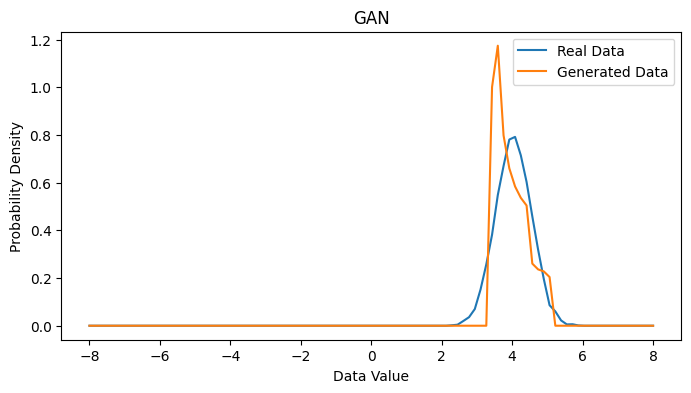

In [ ]:
main()